##### Now let's test the potentials 

In [1]:
'''
Each generation is programmed to go from 300 to 1400K for 100ps each century temperature. 
Each generation has it own DFT calculations calculation sampled every 2000 steps - 50ps. 
'''

import glob

dirs = sorted(glob.glob('./gen*'),key=lambda string: float(string.replace('./gen','')))
dirs

['./gen0',
 './gen1',
 './gen2',
 './gen3',
 './gen4',
 './gen5',
 './gen6',
 './gen7',
 './gen8',
 './gen9',
 './gen10',
 './gen11',
 './gen12',
 './gen13',
 './gen14',
 './gen15',
 './gen16']

In [2]:
from ase.io.castep import read_castep_castep
from ase.io import Trajectory

for gen in dirs:
    castep_dirs = glob.glob(f'{gen}/config*')
    castep_dirs = [string.split('.bak')[0] for string in castep_dirs]
    castep_dirs = list(set(castep_dirs))
    castep_dirs = sorted(castep_dirs,key=lambda string: float(string.replace(f'{gen}/config','')))
    castep_dirs.extend(glob.glob(f'{gen}/breakingStructureDFT'))
    print(castep_dirs)
    
    traj = Trajectory(f'{gen}/castepTraj.traj','w')
    
    for configs in castep_dirs:
        atoms = read_castep_castep(f'{configs}/castep.castep')[0]
        traj.write(atoms)

['./gen0/breakingStructureDFT']
['./gen1/config2000', './gen1/config4000', './gen1/config6000', './gen1/config8000', './gen1/config10000', './gen1/config12000', './gen1/config14000', './gen1/config16000', './gen1/config18000', './gen1/config20000', './gen1/config22000', './gen1/config24000', './gen1/config26000', './gen1/config28000', './gen1/config30000', './gen1/config32000', './gen1/config34000', './gen1/config36000', './gen1/config38000', './gen1/config40000', './gen1/config42000', './gen1/config44000', './gen1/config46000', './gen1/config48000']
['./gen2/config2000', './gen2/config4000', './gen2/config6000', './gen2/config8000', './gen2/config10000', './gen2/config12000', './gen2/config14000', './gen2/config16000', './gen2/config18000', './gen2/config20000', './gen2/config22000', './gen2/config24000', './gen2/config26000', './gen2/config28000', './gen2/config30000', './gen2/config32000', './gen2/config34000', './gen2/config36000', './gen2/config38000', './gen2/config40000', './gen

In [3]:
import os

os.environ['OMP_NUM_THREADS']="1"

In [4]:
os.environ['OMP_NUM_THREADS']

'1'

In [5]:
import ase 
from ase.io import Trajectory
from quippy.potential import Potential
import os

os.environ['OMP_NUM_THREADS']="1"

resultsDict = {}
for gen in dirs[:-1]: #exclude gen11
    print(gen)
    traj = Trajectory(f'{gen}/castepTraj.traj')

    gen_int = int(gen.strip('./gen'))
    
    aux = []
    for atoms in traj:
        atoms.calc = Potential(param_filename=gen + '/GAP.xml')
        aux.append(atoms.get_potential_energy())
        
    resultsDict[f'gen{gen_int}'] = aux
    
resultsDict

./gen0


/home/vc381/miniconda3/lib/python3.8/site-packages/ase/calculators/calculator.py:507: FutureWarning: The keyword "ignore_bad_restart_file" is deprecated and will be removed in a future version of ASE.  Passing more than one positional argument to Calculator is also deprecated and will stop functioning in the future.  Please pass arguments by keyword (key=value) except optionally the "restart" keyword.
  warnings.warn(FutureWarning(


./gen1
./gen2
./gen3
./gen4
./gen5
./gen6
./gen7
./gen8
./gen9
./gen10
./gen11
./gen12
./gen13
./gen14
./gen15


{'gen0': [-2428.3868517383025],
 'gen1': [-2428.0833909637768,
  -2428.1502066914372,
  -2428.0048730108356,
  -2427.87570202611,
  -2427.8691217963687,
  -2427.9111071434554,
  -2427.749373473696,
  -2427.9743760220204,
  -2427.925189206555,
  -2427.9209373163735,
  -2427.242932491091,
  -2427.5657290996032,
  -2427.6331739261814,
  -2427.159790804576,
  -2427.1583347121077,
  -2426.852449190053,
  -2427.429355033081,
  -2425.7413090254645,
  -2426.7499994539917,
  -2426.2553472124155,
  -2424.7610300632386,
  -2426.7200496848595,
  -2427.225393595205,
  -2427.159179567791],
 'gen2': [-2427.8648878716017,
  -2428.164335431842,
  -2427.938887300758,
  -2428.074300320085,
  -2427.91288533985,
  -2428.0481695181884,
  -2427.882863749904,
  -2427.3342534711296,
  -2429.2983007955486,
  -2428.871822947099,
  -2428.907349657709,
  -2428.925545995123,
  -2429.1631238032196,
  -2429.2095766110815,
  -2429.66856185476,
  -2429.470188093656,
  -2429.133882611787,
  -2428.8241346091886,
  -2429.

In [1]:
resultsDict = {'gen0': [-2428.3868517383025],
 'gen1': [-2428.0833909637768,
  -2428.1502066914372,
  -2428.0048730108356,
  -2427.87570202611,
  -2427.8691217963687,
  -2427.9111071434554,
  -2427.749373473696,
  -2427.9743760220204,
  -2427.925189206555,
  -2427.9209373163735,
  -2427.242932491091,
  -2427.5657290996032,
  -2427.6331739261814,
  -2427.159790804576,
  -2427.1583347121077,
  -2426.852449190053,
  -2427.429355033081,
  -2425.7413090254645,
  -2426.7499994539917,
  -2426.2553472124155,
  -2424.7610300632386,
  -2426.7200496848595,
  -2427.225393595205,
  -2427.159179567791],
 'gen2': [-2427.8648878716017,
  -2428.164335431842,
  -2427.938887300758,
  -2428.074300320085,
  -2427.91288533985,
  -2428.0481695181884,
  -2427.882863749904,
  -2427.3342534711296,
  -2429.2983007955486,
  -2428.871822947099,
  -2428.907349657709,
  -2428.925545995123,
  -2429.1631238032196,
  -2429.2095766110815,
  -2429.66856185476,
  -2429.470188093656,
  -2429.133882611787,
  -2428.8241346091886,
  -2429.2428305305057,
  -2429.091356468107,
  -2429.043109543657,
  -2429.206179570754,
  -2428.4578742272133,
  -2428.5234022207965],
 'gen3': [-2428.040397450451,
  -2428.0168708760357,
  -2427.942710775525,
  -2428.103092160903,
  -2427.7832358561636,
  -2427.8711999810607,
  -2427.871386071833,
  -2427.6639778236527,
  -2427.872767951965,
  -2427.8621338259686,
  -2427.740261875605,
  -2427.643454865316,
  -2427.5468538426853,
  -2427.5212346892786,
  -2427.5846951123053,
  -2427.0269993318907,
  -2427.6516613557874,
  -2426.6421365372653,
  -2426.7434407074466,
  -2426.084276193975,
  -2426.2531079101045,
  -2425.911094096888,
  -2426.2605180917594,
  -2424.792480409468],
 'gen4': [-2428.1992776793513,
  -2428.11944846126,
  -2428.108520328254,
  -2427.908201443687,
  -2427.8916094110064,
  -2427.9162489839778,
  -2427.72674171163,
  -2427.741948038504,
  -2427.7808114916343,
  -2427.8690818363543,
  -2427.7000088513983,
  -2427.640373039891,
  -2427.5251557288984,
  -2427.780063404129,
  -2427.7329336526946,
  -2427.9386160758627,
  -2427.840144930844,
  -2427.6224511366186,
  -2427.626616892378,
  -2427.6593384115067,
  -2426.95006647273,
  -2426.2676764115786,
  -2426.1079527916168,
  -2427.8550418796385],
 'gen5': [-2428.050956392198,
  -2428.0630177681364,
  -2428.0720566392356,
  -2428.0426914946756,
  -2427.8530836742834,
  -2427.8892075691824,
  -2427.921778479287,
  -2427.786994636432,
  -2427.571483517411,
  -2427.707651622444,
  -2427.6971703191134,
  -2427.565243627221,
  -2427.777333215774,
  -2427.731487492347,
  -2427.481003703594,
  -2427.4867694258487,
  -2427.5731492671625,
  -2427.5348926221163,
  -2426.8207999210263,
  -2427.3013867946643,
  -2426.8122036436453,
  -2427.002024736562,
  -2427.4123700230098,
  -2427.570333505429],
 'gen6': [-2427.9448400880688,
  -2428.021232710332,
  -2427.9348482345913,
  -2427.966682960658,
  -2427.9707843833958,
  -2427.887022502659,
  -2427.8183109282277,
  -2427.7635051849848,
  -2427.55540891699,
  -2427.547567910659,
  -2427.564437357942,
  -2427.9334814041968,
  -2427.7011659891273,
  -2427.3914564297183,
  -2427.450674946194,
  -2427.5524641479806,
  -2427.4025247757772,
  -2426.8496474129333,
  -2427.267744074666,
  -2427.5214116829115,
  -2426.828639382306,
  -2426.8995547985223,
  -2426.0904008289845,
  -2426.9965304376815],
 'gen7': [-2428.098857712327,
  -2428.0784211330993,
  -2427.9068071930615,
  -2427.9951398928533,
  -2427.7343206270934,
  -2427.9546491132514,
  -2427.7304859028122,
  -2427.9337370880517,
  -2427.5890629830155,
  -2427.9988692524694,
  -2427.70196494564,
  -2427.882918630055,
  -2427.815230585001,
  -2427.8251691578753,
  -2427.6124628277253,
  -2427.7033850679795,
  -2426.9396331833645,
  -2426.9626863486505,
  -2427.2240869771385,
  -2427.5526321369666,
  -2427.8286733125806,
  -2426.7035203483647,
  -2426.1261248603414,
  -2426.7073623322467],
 'gen8': [-2428.0404217743135,
  -2428.113004322211,
  -2428.0255776366985,
  -2428.0906162351744,
  -2427.9728418804093,
  -2427.9808970442623,
  -2427.9155401640583,
  -2427.9595627470676,
  -2427.5269452512684,
  -2427.7806890701913,
  -2427.7166598300473,
  -2427.6980832927375,
  -2427.7349827294083,
  -2427.4001275355436,
  -2427.214251130922,
  -2427.060290857724,
  -2427.68845342181,
  -2427.445670871524,
  -2427.5848890764987,
  -2427.812114157004,
  -2426.2333032860724,
  -2427.565946908568,
  -2426.852467383401,
  -2427.404622537488],
 'gen9': [-2428.0760783268393,
  -2428.054731994786,
  -2428.172934692566,
  -2428.007531560498,
  -2428.0244431778697,
  -2428.0518299735672,
  -2427.8180748096474,
  -2427.928572744109,
  -2427.763555157864,
  -2427.9393664235768,
  -2427.8301129227634,
  -2427.6442718949224,
  -2427.905365092871,
  -2427.603684668889,
  -2427.333262222653,
  -2427.0203515289318,
  -2426.4327187648078,
  -2427.602760109575,
  -2427.5065019191634,
  -2425.8118873272933,
  -2427.130724459817,
  -2427.276393400967,
  -2426.431195189575,
  -2426.5894211272666],
 'gen10': [-2428.043962799318,
  -2428.0873089139495,
  -2427.734672960743,
  -2427.8856411446704,
  -2428.059904454376,
  -2427.7342243199246,
  -2427.83373794981,
  -2427.906007908607,
  -2427.2227694879207,
  -2427.6497479772947,
  -2427.7111957942275,
  -2427.522096332117,
  -2427.7522885656963,
  -2427.3022056875766,
  -2427.533054086869,
  -2427.9477981814457,
  -2427.047459831167,
  -2427.169192332864,
  -2427.101190078633,
  -2427.150227206103,
  -2427.8113200959197,
  -2427.229779453132,
  -2427.6534842314354,
  -2426.4822867265925],
 'gen11': [-2427.989488837038,
  -2428.070343281365,
  -2428.0046397419596,
  -2428.090488412871,
  -2427.7672501616034,
  -2427.683866092885,
  -2427.709803275061,
  -2427.8123359214846,
  -2427.9221101836984,
  -2427.7538772352427,
  -2427.796235130986,
  -2427.5084222222968,
  -2427.8972250499055,
  -2426.86802758602,
  -2427.333568360589,
  -2427.2983527450097,
  -2427.2954113985666,
  -2427.2296686789414,
  -2427.0955232824526,
  -2427.4857249692527,
  -2426.665110110946,
  -2426.760437380547,
  -2427.8367380671443,
  -2427.3268644570176],
 'gen12': [-2428.112424430468,
  -2428.0789353680466,
  -2427.972274790422,
  -2427.898026386654,
  -2427.941071404385,
  -2428.0240506245045,
  -2427.775767950221,
  -2427.6298800146437,
  -2427.622917719104,
  -2427.9617203381376,
  -2427.648847362493,
  -2427.7096596352767,
  -2427.6661800051033,
  -2427.7648833186845,
  -2427.835227257526,
  -2427.314422147723,
  -2427.529783391978,
  -2427.2114146544236,
  -2426.864966079004,
  -2425.9114383593837,
  -2427.0364922678355,
  -2426.3744424756983,
  -2426.215214767854,
  -2426.959307023076],
 'gen13': [-2428.107094855308,
  -2428.1349336180215,
  -2427.9612230848084,
  -2428.1008412344318,
  -2428.063991687648,
  -2427.951791601287,
  -2427.8840230983797,
  -2428.086668113965,
  -2427.5322832181114,
  -2427.8906929145123,
  -2427.7738188196467,
  -2428.085384382381,
  -2427.6300972431754,
  -2427.8135841777835,
  -2427.009898100776,
  -2426.7195643497657,
  -2427.100118264731,
  -2427.116212744033,
  -2427.0909083076117,
  -2427.7181679111927,
  -2426.768895454465,
  -2427.6681590325975,
  -2427.534030497139,
  -2426.9456634194685],
 'gen14': [-2428.12303867402,
  -2427.9963770608715,
  -2427.916006326587,
  -2427.7413361940735,
  -2427.8479015028884,
  -2427.935728650025,
  -2427.5351343815205,
  -2427.8762858187283,
  -2427.689221501557,
  -2427.6968952341454,
  -2427.664216613937,
  -2427.814005483083,
  -2427.6040322857903,
  -2427.9032124679525,
  -2427.067944680891,
  -2426.470704401758,
  -2426.760602781421,
  -2428.095220437344,
  -2426.6796626043965,
  -2427.643190067823,
  -2427.4273405669687,
  -2427.437144707536,
  -2426.612555433199,
  -2426.894209922873],
 'gen15': [-2428.0152837198716,
  -2428.117818861459,
  -2427.8870704137094,
  -2427.967127010068,
  -2427.8254505665827,
  -2427.90791214282,
  -2427.8573042108774,
  -2427.9458001983976,
  -2427.786395006392,
  -2427.898354467637,
  -2427.9475589227923,
  -2427.873323087216,
  -2427.4874077913246,
  -2427.4637570907803,
  -2427.4723001548195,
  -2427.670265681577,
  -2427.437515447246,
  -2427.2433906392707,
  -2427.0850306223015,
  -2427.9252424870806,
  -2426.5237956153505,
  -2427.297789930015,
  -2427.2866963309934,
  -2426.259194210096]}
  

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Text(0.5, 0, 'Configuration')

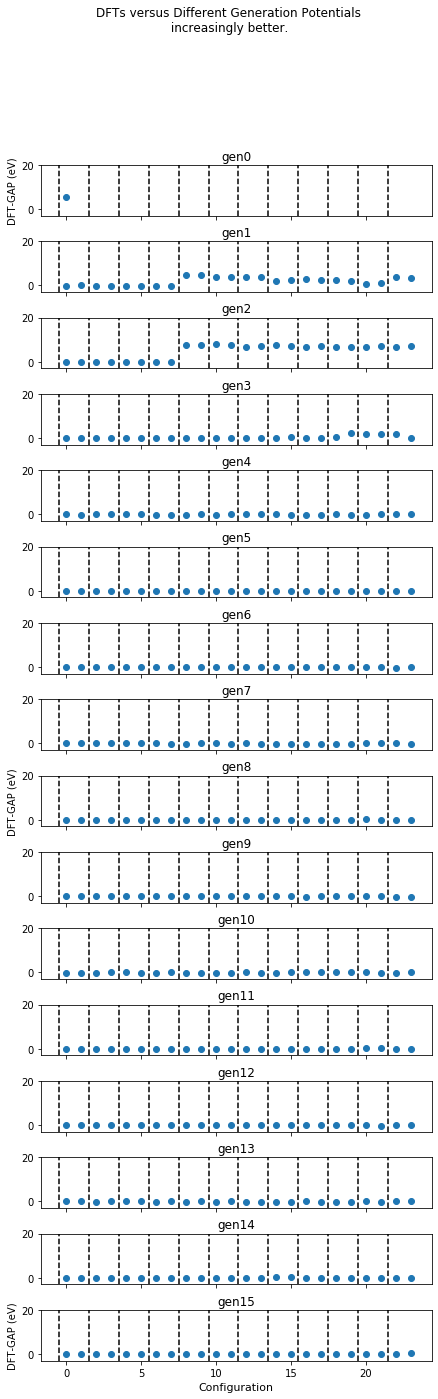

In [7]:
from ase.io import Trajectory
import numpy as np


import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(resultsDict), sharex=True, sharey=True,figsize=(7,22), gridspec_kw={'hspace': 0.5})
fig.suptitle('DFTs versus Different Generation Potentials \n increasingly better. ')

counter = 0
for gen, energies in resultsDict.items():
    
    traj = Trajectory(f'{gen}/castepTraj.traj')

    DFTs = np.array([atoms.get_potential_energy() for atoms in traj])
    differences = DFTs - np.array(energies)
    axs[counter].scatter(list(range(len(differences))),differences)
    axs[counter].set_title(gen,pad=5)
    axs[counter].set_ylim(-3,20)
    
    for x in range(0,24,2):
        axs[counter].axvline(x-0.5,ls='--',color='k')
    counter+=1

axs[0].set_ylabel('DFT-GAP (eV)')
axs[int(counter/2)].set_ylabel('DFT-GAP (eV)')
axs[counter-1].set_ylabel('DFT-GAP (eV)')
axs[counter-1].set_xlabel('Configuration',fontsize=11)

# First vertical line is 300K. Each progressive vertical line denotes an increase of 100K of temperature

Let's try plot the 2b curve for each potential

In [1]:

import glob

dirs = sorted(glob.glob('./gen*'),key=lambda string: float(string.replace('./gen','')))
dirs

['./gen0',
 './gen1',
 './gen2',
 './gen3',
 './gen4',
 './gen5',
 './gen6',
 './gen7',
 './gen8',
 './gen9',
 './gen10',
 './gen11',
 './gen12',
 './gen13',
 './gen14',
 './gen15',
 './gen16',
 './gen17']

In [2]:
import ase 
from ase.io import Trajectory
from quippy.potential import Potential


traj = Trajectory('15042021S2Dissociation-OnlyStructuresNoDFT.traj')

resultsDictS2 = {}
for gen in dirs[:-1]:
    
    gen_int = int(gen.strip('./gen'))
    
    aux = []
    for atoms in traj:
        atoms.calc = Potential(calc_args='only_descriptor=1', param_filename=gen + '/GAP.xml')
        aux.append(atoms.get_potential_energy())
        
    resultsDictS2[f'gen{gen_int}'] = aux
    
resultsDictS2

/home/vc381/miniconda3/lib/python3.8/site-packages/ase/calculators/calculator.py:507: FutureWarning: The keyword "ignore_bad_restart_file" is deprecated and will be removed in a future version of ASE.  Passing more than one positional argument to Calculator is also deprecated and will stop functioning in the future.  Please pass arguments by keyword (key=value) except optionally the "restart" keyword.
  warnings.warn(FutureWarning(


{'gen0': [-554.0601163968834,
  -554.4004896437066,
  -555.5758629684744,
  -557.5585632782052,
  -560.2774938226023,
  -563.6215803098632,
  -567.4467188503434,
  -571.5856831624362,
  -575.8600848365779,
  -580.093216071614,
  -584.1224825021447,
  -587.8101776847791,
  -591.0515582575565,
  -593.779521269181,
  -595.9656120714747,
  -597.6175381284077,
  -598.7737642714158,
  -599.4960608882495,
  -599.8610303244016,
  -599.9516361905073,
  -599.8496198342721,
  -599.6294449727386,
  -599.3541163370494,
  -599.0729251757832,
  -598.8209300420087,
  -598.6198161213572,
  -598.4797013304662,
  -598.4014643129005,
  -598.3792358159656,
  -598.4027914214341,
  -598.4596820415056,
  -598.5370183436637,
  -598.6228768151516,
  -598.7073201150226,
  -598.7830323812989,
  -598.8455741729479,
  -598.893272759112,
  -598.9267868244017,
  -598.9484183844154,
  -598.9612805765166,
  -598.9695931083737,
  -598.9750785007334,
  -598.9781405134233,
  -598.9796788049015,
  -598.9803587288,
  -598.9

In [3]:
resultsDict2 = {'gen0': [-554.0601163968834,
  -554.4004896437066,
  -555.5758629684744,
  -557.5585632782052,
  -560.2774938226023,
  -563.6215803098632,
  -567.4467188503434,
  -571.5856831624362,
  -575.8600848365779,
  -580.093216071614,
  -584.1224825021447,
  -587.8101776847791,
  -591.0515582575565,
  -593.779521269181,
  -595.9656120714747,
  -597.6175381284077,
  -598.7737642714158,
  -599.4960608882495,
  -599.8610303244016,
  -599.9516361905073,
  -599.8496198342721,
  -599.6294449727386,
  -599.3541163370494,
  -599.0729251757832,
  -598.8209300420087,
  -598.6198161213572,
  -598.4797013304662,
  -598.4014643129005,
  -598.3792358159656,
  -598.4027914214341,
  -598.4596820415056,
  -598.5370183436637,
  -598.6228768151516,
  -598.7073201150226,
  -598.7830323812989,
  -598.8455741729479,
  -598.893272759112,
  -598.9267868244017,
  -598.9484183844154,
  -598.9612805765166,
  -598.9695931083737,
  -598.9750785007334,
  -598.9781405134233,
  -598.9796788049015,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen1': [-541.8884768053097,
  -542.2511291488183,
  -543.6563677470506,
  -546.0600710718129,
  -549.3614540876181,
  -553.4086060431976,
  -558.0089225445074,
  -562.9435975512345,
  -567.984788596393,
  -572.9136637391887,
  -577.5373548456585,
  -581.7029224855025,
  -585.3067866096201,
  -588.2986536465135,
  -590.6796939586741,
  -592.4954847268775,
  -593.8249131818986,
  -594.7667256152884,
  -595.4256317209904,
  -595.8998002782857,
  -596.271231718066,
  -596.5999346842975,
  -596.9221711780949,
  -597.2523868348756,
  -597.587919728797,
  -597.9152641607027,
  -598.2165930716103,
  -598.4754034028404,
  -598.680488863861,
  -598.8278804405375,
  -598.9208323808882,
  -598.9682856148895,
  -598.9824530393846,
  -598.9762190313188,
  -598.9609430917656,
  -598.9450487549177,
  -598.9335249609678,
  -598.9282308294307,
  -598.9287265820706,
  -598.9332814328984,
  -598.9436150152425,
  -598.9578706898283,
  -598.969909895291,
  -598.9774550723267,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen2': [-537.0129972520256,
  -538.4866804165897,
  -541.1010628654142,
  -544.7460649499728,
  -549.249138128954,
  -554.3866646449417,
  -559.9006671533091,
  -565.5193003083652,
  -570.9790235952635,
  -576.0460304493274,
  -580.5345025827366,
  -584.3195935101933,
  -587.3436896427113,
  -589.615365397108,
  -591.2014129167758,
  -592.213238053034,
  -592.7896275912456,
  -593.0782946442007,
  -593.2186386191854,
  -593.3278167478668,
  -593.4915837071705,
  -593.7605335376968,
  -594.1515212231127,
  -594.6532969326174,
  -595.2348726359007,
  -595.8549273767669,
  -596.4706521751461,
  -597.0447883295667,
  -597.5501295863462,
  -597.9713232359748,
  -598.3043052319074,
  -598.554053694864,
  -598.7314987954844,
  -598.850386252506,
  -598.9246982470461,
  -598.9669574997417,
  -598.9874536948075,
  -598.9942024403165,
  -598.993317962216,
  -598.9894640633895,
  -598.985576230934,
  -598.9837840194524,
  -598.9832248043141,
  -598.9816819641154,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen3': [-528.6811470853384,
  -530.3314889631031,
  -533.2975245759692,
  -537.4670359399854,
  -542.6572488260965,
  -548.6262946899326,
  -555.0905124220546,
  -561.746050366007,
  -568.2926146999628,
  -574.4568464854776,
  -580.0127693208444,
  -584.7970587443372,
  -588.7175141611763,
  -591.7539808324175,
  -593.9519472536151,
  -595.4099833026805,
  -596.2629409809117,
  -596.6632955994094,
  -596.7630945975645,
  -596.6987005001968,
  -596.5799239324508,
  -596.4843538874513,
  -596.4568474065557,
  -596.5133841146701,
  -596.6479430205757,
  -596.8407943477025,
  -597.0666354057423,
  -597.3012974938713,
  -597.5262264254081,
  -597.7304836067299,
  -597.9105175314282,
  -598.0683276628799,
  -598.2088310388747,
  -598.337236717761,
  -598.4570647705943,
  -598.5691743415766,
  -598.6718618686239,
  -598.7618246615705,
  -598.8356076797093,
  -598.891087393414,
  -598.9335362895117,
  -598.9614029725038,
  -598.9752174802709,
  -598.9801945828885,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen4': [-529.0210577915598,
  -530.7785674356667,
  -533.8356786493489,
  -538.0692918099332,
  -543.2863190580204,
  -549.2363115721485,
  -555.6298918513451,
  -562.1612929051437,
  -568.5326979651975,
  -574.4777430504721,
  -579.78156144627,
  -584.2951330505414,
  -587.942411958483,
  -590.7196450424774,
  -592.6873221610251,
  -593.9561547479345,
  -594.6692123039786,
  -594.9827407493533,
  -595.0481862052504,
  -594.9975655352857,
  -594.9336407132607,
  -594.9254986811823,
  -595.0092677145833,
  -595.1929657455287,
  -595.4639915290566,
  -595.7975966908955,
  -596.1648124756277,
  -596.5386875911893,
  -596.8982194869998,
  -597.2299103460493,
  -597.5273403230487,
  -597.7894452861321,
  -598.0182809484788,
  -598.2169635019193,
  -598.388251051106,
  -598.5339447632462,
  -598.6550205819979,
  -598.7522128941666,
  -598.826694085313,
  -598.8805298045402,
  -598.9227898739991,
  -598.9531171665233,
  -598.969818358749,
  -598.9776687112984,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen5': [-526.800740803784,
  -528.6399680637217,
  -531.7821688567303,
  -536.0931749854747,
  -541.3693788539633,
  -547.3515101914338,
  -553.7441266828785,
  -560.2389876392656,
  -566.5398887687581,
  -572.3862389313101,
  -577.5727237658677,
  -581.9628395133288,
  -585.4948452896308,
  -588.1796684237299,
  -590.0913581609595,
  -591.3516530874288,
  -592.1109533614465,
  -592.5283559667398,
  -592.753366680826,
  -592.9114647702183,
  -593.0949523728443,
  -593.3596083572586,
  -593.7267490746556,
  -594.1895319812568,
  -594.7218424894193,
  -595.2879419650519,
  -595.8512214554169,
  -596.380836001171,
  -596.8555787236357,
  -597.2649639875265,
  -597.6080053254366,
  -597.8905092442685,
  -598.1218203721758,
  -598.311856903277,
  -598.4690208589557,
  -598.5992345953812,
  -598.7060285443251,
  -598.7913573255748,
  -598.8566963941805,
  -598.9039795684832,
  -598.9402878227257,
  -598.9647711435816,
  -598.9764725035968,
  -598.9799875682196,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen6': [-530.8382845121916,
  -532.4170798357329,
  -535.244927442963,
  -539.2064067549029,
  -544.1187005084169,
  -549.7435231261873,
  -555.8046946457428,
  -562.0097618827815,
  -568.073466793848,
  -573.7405193737461,
  -578.8051213751708,
  -583.1250319536587,
  -586.6286343225613,
  -589.3143652747779,
  -591.2428747629267,
  -592.5232356923618,
  -593.2952738019624,
  -593.7105146302595,
  -593.9142838956425,
  -594.0311509897103,
  -594.1552418193417,
  -594.3460904279011,
  -594.6298028401318,
  -595.0045265974579,
  -595.4486820845152,
  -595.9301918252706,
  -596.4150522031807,
  -596.8739765972816,
  -597.2863990251892,
  -597.641737089328,
  -597.9383484328093,
  -598.1809794792455,
  -598.3776474638973,
  -598.5368170590039,
  -598.665478666105,
  -598.768386317369,
  -598.848360476771,
  -598.9072865860828,
  -598.9472987908478,
  -598.9716482293218,
  -598.9844643651542,
  -598.9881826668326,
  -598.9866485002212,
  -598.9828141414993,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen7': [-528.877315704088,
  -530.5580302032497,
  -533.5196549545028,
  -537.6388107351188,
  -542.7230730654803,
  -548.5237457440483,
  -554.754408787044,
  -561.1135271101768,
  -567.308792977022,
  -573.0805398945624,
  -578.2215815441552,
  -582.5912180277039,
  -586.1218743092134,
  -588.8177950974598,
  -590.7462744246398,
  -592.0228827775093,
  -592.7929124616887,
  -593.2116712766685,
  -593.4262528614593,
  -593.5610082854503,
  -593.7082172448384,
  -593.9245438866594,
  -594.2329267222769,
  -594.6287567994543,
  -595.0886723151882,
  -595.5801129040294,
  -596.0699359476378,
  -596.5308376194255,
  -596.9449309218428,
  -597.3044761950835,
  -597.6103068950863,
  -597.8688475769261,
  -598.0887345360345,
  -598.2779305042161,
  -598.4419298314854,
  -598.5832680152919,
  -598.7021767494837,
  -598.797947047354,
  -598.8704318236516,
  -598.9211493671021,
  -598.9561691586838,
  -598.9753982799008,
  -598.9815155741535,
  -598.9812651790432,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen8': [-524.8043865474203,
  -526.6382734580432,
  -529.8713615379049,
  -534.3743156930971,
  -539.9408377686443,
  -546.3010038428577,
  -553.1411765137993,
  -560.1286885244583,
  -566.9387747917601,
  -573.2808072553701,
  -578.9208511331046,
  -583.6979461039111,
  -587.5322876513922,
  -590.4245406294169,
  -592.4467029428736,
  -593.7260664262387,
  -594.424711817973,
  -594.717479293565,
  -594.771394707622,
  -594.7291060092496,
  -594.6980787841123,
  -594.7462666447202,
  -594.9039013670802,
  -595.1701300871894,
  -595.5226165462911,
  -595.9280080005221,
  -596.3513551318422,
  -596.7630859935118,
  -597.1428433434733,
  -597.4802352992222,
  -597.7731668547451,
  -598.0247991499448,
  -598.2402713946024,
  -598.4241332181657,
  -598.5790494739297,
  -598.7058699452857,
  -598.8047266124079,
  -598.876534203165,
  -598.9241855688408,
  -598.9528578380662,
  -598.970204618813,
  -598.9794701283392,
  -598.9820226349913,
  -598.980741596073,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen9': [-521.807159842446,
  -523.8250606511021,
  -527.2746666402629,
  -532.0128411245344,
  -537.8188038306209,
  -544.4088573266883,
  -551.4576300348956,
  -558.6238573917756,
  -565.5780286731417,
  -572.0288552493832,
  -577.7455496601863,
  -582.5733665937835,
  -586.4406992216348,
  -589.3571326534832,
  -591.4030645894338,
  -592.7126214100674,
  -593.4524454430896,
  -593.7993686185321,
  -593.9199517871123,
  -593.9543742129565,
  -594.0063021777416,
  -594.1393102913964,
  -594.3793663873614,
  -594.7220069574644,
  -595.1422686493418,
  -595.605276986443,
  -596.0756198017436,
  -596.524168172192,
  -596.9317159305895,
  -597.2895315542221,
  -597.5975069945373,
  -597.8609425360439,
  -598.0870817228963,
  -598.2823273357601,
  -598.4507041314748,
  -598.5936944854723,
  -598.711171829683,
  -598.8028850138392,
  -598.8698552343733,
  -598.915138614698,
  -598.9471466844492,
  -598.9676682796202,
  -598.9773369711148,
  -598.9800297600697,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen10': [-524.5114848069745,
  -526.221702872291,
  -529.2775554945649,
  -533.5502060441752,
  -538.8391835443865,
  -544.8859995506893,
  -551.3936949219017,
  -558.0504659705432,
  -564.5548975826343,
  -570.6400114687087,
  -576.0933933208973,
  -580.771109292032,
  -584.6039112295068,
  -587.5952520105159,
  -589.8117324475127,
  -591.3676054901255,
  -592.4057093121912,
  -593.0775679823521,
  -593.5253318809075,
  -593.8677518840516,
  -594.1915867296732,
  -594.5488818373226,
  -594.9596053907983,
  -595.4183498088198,
  -595.9033286677252,
  -596.3857814306496,
  -596.8381286352044,
  -597.2397196931518,
  -597.5796592868676,
  -597.856844407371,
  -598.0778640298915,
  -598.2537184281057,
  -598.3963711997742,
  -598.5159770909479,
  -598.6193017052531,
  -598.7094602383397,
  -598.7867485911513,
  -598.8500984941304,
  -598.8986001167025,
  -598.9326015517829,
  -598.9565882188483,
  -598.9710994081445,
  -598.9775879474323,
  -598.9798114037015,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen11': [-514.0373565594957,
  -515.8560892603739,
  -519.2668787934119,
  -524.1391738647756,
  -530.2562700172086,
  -537.3291903287275,
  -545.0178446465391,
  -552.9575498729785,
  -560.7882040142242,
  -568.182936321896,
  -574.8730029979008,
  -580.6660996777457,
  -585.4560818496204,
  -589.2232131400481,
  -592.0253311566878,
  -593.9815321300805,
  -595.2509333230366,
  -596.0096203654059,
  -596.4289396963534,
  -596.6578561206218,
  -596.8112521721152,
  -596.9649606918204,
  -597.1571954161147,
  -597.3950770076292,
  -597.6643050761588,
  -597.939791667169,
  -598.1952546478526,
  -598.4102944966974,
  -598.5742075340343,
  -598.6865556673249,
  -598.7551582016415,
  -598.7925771924595,
  -598.8122793640025,
  -598.8254896027313,
  -598.8393784061002,
  -598.8567610478524,
  -598.8770507787733,
  -598.8979031106603,
  -598.9168724503209,
  -598.9324837717315,
  -598.9477974369436,
  -598.9620357790194,
  -598.9716073432483,
  -598.9772469298888,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen12': [-519.4722979528553,
  -521.5933957243935,
  -525.1792507767852,
  -530.0775008089652,
  -536.0571044810888,
  -542.8242753829647,
  -550.0449611830074,
  -557.3717025167964,
  -564.472018222262,
  -571.0551309834802,
  -576.8939503411923,
  -581.8397814858865,
  -585.8281658383305,
  -588.875450465431,
  -591.0669444972693,
  -592.5386487838798,
  -593.4553542617753,
  -593.9882618873191,
  -594.2951290983576,
  -594.50533220691,
  -594.7112731380432,
  -594.9664354292429,
  -595.2893155518207,
  -595.6716114252442,
  -596.0885759343321,
  -596.5093951578413,
  -596.9057973792471,
  -597.2577323369144,
  -597.5557243310134,
  -597.8002290976976,
  -597.9988687445832,
  -598.1626912453896,
  -598.3025795631067,
  -598.426666121067,
  -598.5391870671331,
  -598.6407568171082,
  -598.7296691598197,
  -598.803616733315,
  -598.8611979444206,
  -598.9027309007245,
  -598.9349522149103,
  -598.9579535342256,
  -598.9707568280511,
  -598.9773886988406,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen13': [-519.7048585881305,
  -521.0297466573131,
  -523.8585164146091,
  -528.0892646334862,
  -533.5370480848098,
  -539.9451219114665,
  -547.0033877422204,
  -554.3724525713435,
  -561.7108864684371,
  -568.7027281731382,
  -575.0821296861061,
  -580.6523073344681,
  -585.2966617456943,
  -588.9809546458812,
  -591.7466364005625,
  -593.6966160756813,
  -594.9757609526962,
  -595.7490403446238,
  -596.1803868109521,
  -596.4150172099864,
  -596.567205619019,
  -596.7144749713,
  -596.8980669112746,
  -597.1285618547802,
  -597.3948246865868,
  -597.6741527584629,
  -597.9416248315349,
  -598.1771302796653,
  -598.3692671011333,
  -598.5160680571964,
  -598.6231804866504,
  -598.7005578538112,
  -598.7588532820184,
  -598.8065435078054,
  -598.8484280139048,
  -598.8856589973977,
  -598.9169935487619,
  -598.9406324781878,
  -598.9558902552264,
  -598.9640409864762,
  -598.9691481162207,
  -598.9739666195364,
  -598.9776512855843,
  -598.9793162588289,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen14': [-519.1958493979866,
  -521.1617158043184,
  -524.6198426666481,
  -529.4296504772167,
  -535.3691607002213,
  -542.1496375085364,
  -549.437123538398,
  -556.8788782782315,
  -564.1319826621723,
  -570.8909566884497,
  -576.911239823977,
  -582.0258356866937,
  -586.153278656576,
  -589.2962246290219,
  -591.5312293708369,
  -592.9914564526509,
  -593.8449608007897,
  -594.2716754989626,
  -594.4422132485881,
  -594.5010930581586,
  -594.5561173929702,
  -594.6745233210779,
  -594.885416148066,
  -595.1870634700856,
  -595.5570351768213,
  -595.9630012890368,
  -596.3722388705457,
  -596.758465151662,
  -597.105361647856,
  -597.4069143697373,
  -597.6653122404925,
  -597.8875091723851,
  -598.081620299806,
  -598.2541149841084,
  -598.4083717763963,
  -598.5446907298203,
  -598.6614372736979,
  -598.7567156279431,
  -598.8298900015391,
  -598.8823873794311,
  -598.9234824950786,
  -598.9533268444695,
  -598.9697886986406,
  -598.9773608070939,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen15': [-514.3658358154055,
  -515.8812841943247,
  -518.9887828483945,
  -523.5739312573453,
  -529.4355147737836,
  -536.2979810896898,
  -543.8313016613495,
  -551.6764504215782,
  -559.4739228762876,
  -566.8922112869143,
  -573.6530482446644,
  -579.5505747010131,
  -584.462350220226,
  -588.3512006883204,
  -591.2581303934378,
  -593.2877166034698,
  -594.5883622561043,
  -595.330350539308,
  -595.6847363572263,
  -595.8057221746815,
  -595.8183844706903,
  -595.812597042833,
  -595.8429325584541,
  -595.9334075973995,
  -596.0853235240313,
  -596.2862316607309,
  -596.5182192002205,
  -596.7641958823035,
  -597.0115265341403,
  -597.2530417648479,
  -597.4860203381643,
  -597.7100669898457,
  -597.9248665777297,
  -598.12860423393,
  -598.3174814964398,
  -598.4863413020169,
  -598.6300531854752,
  -598.7450914767535,
  -598.830706683136,
  -598.8892355297205,
  -598.9306170198565,
  -598.956879899743,
  -598.9700533416927,
  -598.9768751647355,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288],
 'gen16': [-517.7924749508486,
  -519.601068917854,
  -522.9254311692378,
  -527.6292591590275,
  -533.4928301061548,
  -540.2275328391363,
  -547.4975746182129,
  -554.9468584803792,
  -562.2282350841663,
  -569.0318757928428,
  -575.1094907917388,
  -580.2915631755998,
  -584.495645862956,
  -587.7249552207461,
  -590.057815121497,
  -591.6297478086883,
  -592.610969060722,
  -593.1825645672318,
  -593.5146179869291,
  -593.7490386616657,
  -593.9889017803464,
  -594.2949434814611,
  -594.6886649077162,
  -595.1605056998771,
  -595.6809159443758,
  -596.2119750025552,
  -596.7174714486421,
  -597.169977786961,
  -597.5542696830482,
  -597.8672675625087,
  -598.1153477024302,
  -598.3102590003648,
  -598.4649414342305,
  -598.5903012191295,
  -598.6935487770927,
  -598.7781796392476,
  -598.8452104365963,
  -598.8949798023234,
  -598.9287444998292,
  -598.9494420590993,
  -598.9631168271052,
  -598.9724806350259,
  -598.977514622521,
  -598.9793361646833,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288,
  -598.9803587288]}

In [4]:
distances = [0.1, 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9]

print(distances)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]


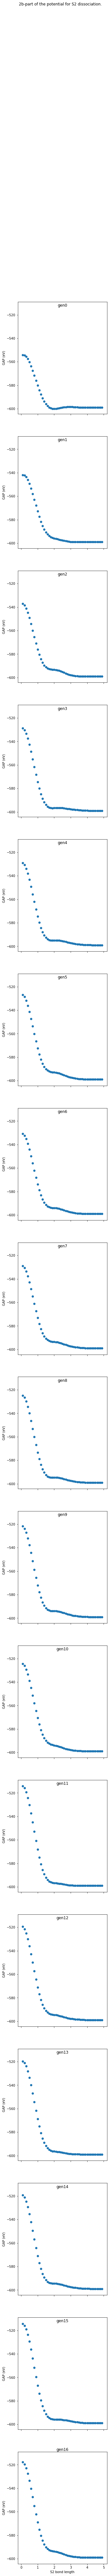

In [5]:
from ase.io import Trajectory
import numpy as np

import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(resultsDictS2), sharex=True, sharey=True,figsize=(5,130))
fig.suptitle('2b-part of the potential for S2 dissociation. ')

counter = 0
for gen, energies in resultsDictS2.items():

    axs[counter].scatter(distances,energies)
    axs[counter].set_title(gen,pad=-15)
    axs[counter].set_ylabel('GAP (eV)')
    
    
    counter+=1

axs[counter-1].set_xlabel('S2 bond length')
plt.show()

### 07.05.2021 Let's test the different potentials on a traj made up of sampled DFT MD non polarised between 300K and 1400K

In [1]:

import glob

dirs = sorted(glob.glob('./gen*'),key=lambda string: float(string.replace('./gen','')))
dirs

['./gen0',
 './gen1',
 './gen2',
 './gen3',
 './gen4',
 './gen5',
 './gen6',
 './gen7',
 './gen8',
 './gen9',
 './gen10',
 './gen11',
 './gen12',
 './gen13',
 './gen14',
 './gen15',
 './gen16',
 './gen17']

In [2]:
import ase 
from ase.io import Trajectory
from quippy.potential import Potential
import os

os.environ['OMP_NUM_THREADS']="1"
traj = Trajectory('05052021NonPolDFTMDSampled110StructsBetween300and1400K.traj')

resultsDict = {}
for gen in dirs[:-1]:

    print(gen)
    

    gen_int = int(gen.strip('./gen'))
    
    aux = []
    for atoms in traj:
        atoms.calc = Potential(param_filename=gen + '/GAP.xml')
        aux.append(atoms.get_potential_energy())
        
    resultsDict[f'gen{gen_int}'] = aux
    
resultsDict

./gen0


/home/vc381/miniconda3/lib/python3.8/site-packages/ase/calculators/calculator.py:507: FutureWarning: The keyword "ignore_bad_restart_file" is deprecated and will be removed in a future version of ASE.  Passing more than one positional argument to Calculator is also deprecated and will stop functioning in the future.  Please pass arguments by keyword (key=value) except optionally the "restart" keyword.
  warnings.warn(FutureWarning(


./gen1
./gen2
./gen3
./gen4
./gen5
./gen6
./gen7
./gen8
./gen9
./gen10
./gen11
./gen12
./gen13
./gen14
./gen15
./gen16


{'gen0': [-2428.0528474660714,
  -2428.0535027915407,
  -2428.1497291891783,
  -2428.158381205882,
  -2428.062372897084,
  -2428.1544986355116,
  -2428.1527733923704,
  -2428.0666408570914,
  -2428.015186705214,
  -2428.114698713925,
  -2427.8952203772865,
  -2427.790006787402,
  -2428.1272417285863,
  -2428.1042885931543,
  -2428.102245007822,
  -2428.0757704929392,
  -2427.9325396706417,
  -2427.983676872612,
  -2428.006799951657,
  -2427.966598010175,
  -2428.1538388241975,
  -2428.0376666329034,
  -2427.853930099007,
  -2427.908865436867,
  -2427.739434525277,
  -2427.873105829128,
  -2427.877424262385,
  -2428.1107861897412,
  -2427.9920998261473,
  -2427.9492767126844,
  -2427.933860497382,
  -2427.8711763980473,
  -2427.4564870579497,
  -2427.91687089962,
  -2427.8942164852006,
  -2427.897212930105,
  -2427.832578485018,
  -2427.7468446117864,
  -2427.8692188297864,
  -2427.0893141419933,
  -2427.671712306091,
  -2427.8670135425286,
  -2427.84458496037,
  -2427.600620134493,
  -

In [3]:
resultsDict ={'gen0': [-2428.0528474660714,
  -2428.0535027915407,
  -2428.1497291891783,
  -2428.158381205882,
  -2428.062372897084,
  -2428.1544986355116,
  -2428.1527733923704,
  -2428.0666408570914,
  -2428.015186705214,
  -2428.114698713925,
  -2427.8952203772865,
  -2427.790006787402,
  -2428.1272417285863,
  -2428.1042885931543,
  -2428.102245007822,
  -2428.0757704929392,
  -2427.9325396706417,
  -2427.983676872612,
  -2428.006799951657,
  -2427.966598010175,
  -2428.1538388241975,
  -2428.0376666329034,
  -2427.853930099007,
  -2427.908865436867,
  -2427.739434525277,
  -2427.873105829128,
  -2427.877424262385,
  -2428.1107861897412,
  -2427.9920998261473,
  -2427.9492767126844,
  -2427.933860497382,
  -2427.8711763980473,
  -2427.4564870579497,
  -2427.91687089962,
  -2427.8942164852006,
  -2427.897212930105,
  -2427.832578485018,
  -2427.7468446117864,
  -2427.8692188297864,
  -2427.0893141419933,
  -2427.671712306091,
  -2427.8670135425286,
  -2427.84458496037,
  -2427.600620134493,
  -2427.7311293380535,
  -2427.663176104006,
  -2427.943891199808,
  -2427.9929533426402,
  -2428.012455246271,
  -2427.7575650573067,
  -2427.943857011576,
  -2427.8894607758507,
  -2427.821974846403,
  -2427.664687441107,
  -2427.605486279405,
  -2427.5859378484074,
  -2427.5445713006443,
  -2428.0731974715945,
  -2427.46566571883,
  -2427.2125593232718,
  -2427.1811056753113,
  -2427.671624786811,
  -2427.694537889372,
  -2427.4967457809294,
  -2427.8180008613285,
  -2427.385634985177,
  -2427.8076617391093,
  -2427.7899024026306,
  -2427.892751283281,
  -2427.7943472643724,
  -2427.5259315514168,
  -2427.904860976984,
  -2427.6174299262616,
  -2427.0053310552726,
  -2427.2920211008586,
  -2427.742604009622,
  -2427.5721501667285,
  -2427.2547150622586,
  -2427.146072874134,
  -2427.689486156105,
  -2427.250531422838,
  -2427.530244197177,
  -2427.784992136333,
  -2427.6051249315237,
  -2427.2203315920833,
  -2427.4386213279126,
  -2427.2041196658056,
  -2426.3349952459257,
  -2427.3794445764347,
  -2426.7261933323434,
  -2426.9855316565813,
  -2427.772897944083,
  -2426.948442419653,
  -2427.119881225618,
  -2427.467260777693,
  -2426.4433302563057,
  -2427.3681734171623,
  -2427.409977764326,
  -2427.5865822282217,
  -2427.0502790278056,
  -2427.544181883035,
  -2427.0571073499095,
  -2426.221418436292,
  -2426.934098269767,
  -2427.2541904685813,
  -2427.2047321610635,
  -2427.376421432431,
  -2427.5353837121515,
  -2426.7935032891887,
  -2427.33612532696],
 'gen1': [-2428.0185913400846,
  -2427.8637349616674,
  -2427.964170016903,
  -2428.032801070318,
  -2427.899527336799,
  -2428.054965178239,
  -2428.0071920816586,
  -2427.9198812590525,
  -2427.853363767103,
  -2428.059517968995,
  -2427.7634560659044,
  -2427.7564931559637,
  -2427.97876819717,
  -2427.922746899333,
  -2428.038962095222,
  -2427.849666166686,
  -2427.8002959115906,
  -2427.9071250903344,
  -2427.9896504493818,
  -2427.93158553651,
  -2428.05463453764,
  -2427.916593993187,
  -2427.4751656478834,
  -2427.6452874331985,
  -2427.5878792455474,
  -2427.5369840962867,
  -2427.722392992493,
  -2427.9915913249974,
  -2427.8736430812733,
  -2427.767113315773,
  -2427.9204425825355,
  -2427.797471529042,
  -2427.2325315747535,
  -2427.7231864014866,
  -2427.7119749602857,
  -2427.8654443393484,
  -2427.640574304403,
  -2427.6290574286004,
  -2427.7745648447058,
  -2426.8923042749316,
  -2427.347050480546,
  -2427.737952539819,
  -2427.6890367349224,
  -2427.328191038434,
  -2427.456081025049,
  -2427.4897897270534,
  -2427.904762872797,
  -2427.8264107924465,
  -2427.880691426874,
  -2427.6856245162926,
  -2427.7552155379376,
  -2427.735479249263,
  -2427.483577226916,
  -2427.453443831333,
  -2427.3310012992756,
  -2427.5572665804984,
  -2427.245213968805,
  -2427.966494335076,
  -2427.3010036393307,
  -2426.9966904663224,
  -2426.9087163380923,
  -2427.354125968724,
  -2427.1897389087912,
  -2426.9228634768615,
  -2427.6549237642184,
  -2427.336322950643,
  -2427.707383360427,
  -2427.682585626371,
  -2427.5645148142085,
  -2427.0108075528783,
  -2427.2980482587986,
  -2427.753766510203,
  -2427.2490269680206,
  -2426.761685883578,
  -2427.112818883839,
  -2427.3661446017404,
  -2427.18047658965,
  -2426.791991545513,
  -2426.6583995029237,
  -2427.3699149290965,
  -2426.885917021047,
  -2427.0966545527285,
  -2427.445666376978,
  -2427.0222171365867,
  -2426.921428903879,
  -2426.891470327534,
  -2426.501098402822,
  -2425.7252010315246,
  -2426.9655695051943,
  -2426.2461209168973,
  -2426.5493602776382,
  -2427.576830287442,
  -2426.780520283156,
  -2426.8219525615173,
  -2427.1867404510363,
  -2426.0744092891473,
  -2427.2710789384037,
  -2427.0957946146527,
  -2427.38755971975,
  -2426.991892357371,
  -2427.337153170213,
  -2426.9835686820775,
  -2425.8890181968623,
  -2426.2972670689223,
  -2426.8416907484516,
  -2426.6944154815797,
  -2427.1772292283836,
  -2427.281291067219,
  -2426.6811820413386,
  -2426.749296546065],
 'gen2': [-2428.02586739004,
  -2427.9095526373617,
  -2427.9856413042157,
  -2428.0502182053165,
  -2428.025251073093,
  -2428.118048460864,
  -2428.0467625257115,
  -2428.003534760856,
  -2427.920949840167,
  -2428.114381058874,
  -2427.777278021854,
  -2427.7722974799217,
  -2427.999982398109,
  -2427.965261987238,
  -2428.071372830072,
  -2427.9639069798654,
  -2427.925937179694,
  -2427.961982770916,
  -2427.992810522719,
  -2427.9357063356742,
  -2428.073031008055,
  -2427.961253183293,
  -2427.6812253040043,
  -2427.7571101763974,
  -2427.7797477405657,
  -2427.7625677446495,
  -2427.8466265984275,
  -2428.012138698692,
  -2427.8720600012152,
  -2427.9025380867834,
  -2427.954926185872,
  -2427.853970729328,
  -2427.4006530589336,
  -2427.8147583956434,
  -2427.7875256612388,
  -2427.8895445840194,
  -2427.730158784817,
  -2427.733982214998,
  -2427.842364467314,
  -2427.1914016069886,
  -2427.5331532728524,
  -2427.743795100638,
  -2427.795058298408,
  -2427.4752845320236,
  -2427.534131027766,
  -2427.535879712562,
  -2427.895743759637,
  -2427.9018756026558,
  -2427.9527693414398,
  -2427.6703506068,
  -2427.8665002686275,
  -2427.783492305092,
  -2427.530428060791,
  -2427.552027795989,
  -2427.503789699906,
  -2427.5945668288186,
  -2427.495722990891,
  -2427.9894174727146,
  -2427.3725460900814,
  -2427.259164377731,
  -2427.1240910487295,
  -2427.4430953029505,
  -2427.238960098683,
  -2427.2222569611945,
  -2427.794318867318,
  -2427.3926805293067,
  -2427.78148228494,
  -2427.748694711704,
  -2427.676672259321,
  -2427.134050292338,
  -2427.3383903555778,
  -2427.7239931514573,
  -2427.365670731981,
  -2427.1901657354315,
  -2427.2584888463534,
  -2427.553392890221,
  -2427.4118742908686,
  -2427.1063238755664,
  -2427.155691639927,
  -2427.594357584063,
  -2427.368557268986,
  -2427.2195274490887,
  -2427.598089273694,
  -2427.266393297636,
  -2427.371858111395,
  -2427.3173412995957,
  -2426.9248254889394,
  -2426.217686036127,
  -2427.171849574493,
  -2426.572913492259,
  -2426.978919130401,
  -2427.7500205768124,
  -2426.955013994518,
  -2427.275699321084,
  -2427.312292257559,
  -2426.5017478001655,
  -2427.4094414878064,
  -2427.2248529299804,
  -2427.499379364543,
  -2427.094474842509,
  -2427.5181401881173,
  -2427.1737623889485,
  -2426.2986719614005,
  -2426.881749077201,
  -2427.171259320364,
  -2427.099140670997,
  -2427.223894049249,
  -2427.516902594185,
  -2426.840749026327,
  -2427.0138157843735],
 'gen3': [-2428.031994904419,
  -2427.905750226108,
  -2428.0207062554114,
  -2428.05778337773,
  -2427.9893417099634,
  -2428.1019986673186,
  -2428.0958297524926,
  -2427.975541408666,
  -2427.923213910844,
  -2428.0973316586633,
  -2427.7853874504967,
  -2427.758745155645,
  -2428.030229873832,
  -2428.0066297334,
  -2428.0890377385394,
  -2427.9537011430516,
  -2427.9170273539316,
  -2427.9817235069304,
  -2427.995311366883,
  -2427.9411598614242,
  -2428.0992981793406,
  -2427.9592938760034,
  -2427.643448037851,
  -2427.745397231089,
  -2427.6803173216867,
  -2427.7163450199896,
  -2427.8075240671837,
  -2428.0252769740173,
  -2427.877330129233,
  -2427.861594714383,
  -2427.95998705682,
  -2427.858709699372,
  -2427.3759005735405,
  -2427.8164433633674,
  -2427.8266012910135,
  -2427.8877259956303,
  -2427.728953388592,
  -2427.741870194953,
  -2427.8165315635074,
  -2427.0807483522453,
  -2427.4436068933314,
  -2427.7298028580617,
  -2427.7502680929456,
  -2427.540036327815,
  -2427.5126503976585,
  -2427.508911909553,
  -2427.9078482270925,
  -2427.903325401063,
  -2427.9531599515267,
  -2427.668669529112,
  -2427.8543630556155,
  -2427.7389087357274,
  -2427.5608425303913,
  -2427.537907406597,
  -2427.5022342272164,
  -2427.540409404797,
  -2427.417598152536,
  -2427.9719527053085,
  -2427.3237064510304,
  -2427.1816605386407,
  -2427.0650743096458,
  -2427.475707365618,
  -2427.1650396261603,
  -2427.3507879767735,
  -2427.7890212288603,
  -2427.360845883831,
  -2427.7406767127204,
  -2427.6960520098883,
  -2427.631469370173,
  -2427.183239432416,
  -2427.319265405723,
  -2427.729029806749,
  -2427.1924373027,
  -2427.009588807504,
  -2427.272885932427,
  -2427.458704054087,
  -2427.3678876501667,
  -2426.9721066713005,
  -2426.877251016784,
  -2427.3994507541256,
  -2427.195895289837,
  -2427.1658465527667,
  -2427.6240119665085,
  -2426.9531253258415,
  -2427.1517597122133,
  -2427.2836990714973,
  -2426.57467906746,
  -2425.8716669337946,
  -2426.9488647971507,
  -2426.1517080577833,
  -2426.838019967792,
  -2427.7335802688362,
  -2426.9279191255846,
  -2426.9852427798296,
  -2427.1993969276987,
  -2426.3493395337587,
  -2427.3803836284033,
  -2427.287500895875,
  -2427.493109917783,
  -2427.03382087731,
  -2427.4547177549402,
  -2426.981743227333,
  -2426.236471566211,
  -2426.716955313888,
  -2427.0438371378577,
  -2426.95774568444,
  -2427.221205808281,
  -2427.463252627484,
  -2426.8570094398933,
  -2427.006976009138],
 'gen4': [-2428.045453799048,
  -2427.923521719301,
  -2428.066914149514,
  -2428.0883633822073,
  -2428.015344752597,
  -2428.117673798651,
  -2428.1047023194133,
  -2428.001723678657,
  -2427.9494250657485,
  -2428.1007813209058,
  -2427.816027969943,
  -2427.7943998506244,
  -2428.0563333879104,
  -2428.0214805023993,
  -2428.080926319485,
  -2427.960752861737,
  -2427.9254262554387,
  -2427.970625162683,
  -2428.0074776402134,
  -2427.957779869646,
  -2428.1127122768094,
  -2427.970509310518,
  -2427.6513260050447,
  -2427.779041748234,
  -2427.7029855411633,
  -2427.7318118809626,
  -2427.8205645123026,
  -2428.0476661988746,
  -2427.901685655023,
  -2427.877916665952,
  -2427.962350159964,
  -2427.8326744614874,
  -2427.3979380440005,
  -2427.8256103155386,
  -2427.8184192775293,
  -2427.884723132587,
  -2427.743255116012,
  -2427.746169655207,
  -2427.7877874503074,
  -2427.0608339971373,
  -2427.5063087149906,
  -2427.7483158508066,
  -2427.7707575580853,
  -2427.4519507148434,
  -2427.541193763562,
  -2427.5667451232525,
  -2427.9284748111386,
  -2427.914705309839,
  -2427.964236430797,
  -2427.6989445806753,
  -2427.861021838271,
  -2427.7711946198224,
  -2427.605453546704,
  -2427.5330731097074,
  -2427.542099046884,
  -2427.552529993585,
  -2427.4704208215007,
  -2428.0021181212987,
  -2427.3883027644088,
  -2427.114676563879,
  -2427.1609767182053,
  -2427.457656618888,
  -2427.2940485777376,
  -2427.366863668646,
  -2427.7989005315644,
  -2427.3519977780466,
  -2427.7569652758957,
  -2427.7359562496595,
  -2427.719497479994,
  -2427.222055793583,
  -2427.3533432854024,
  -2427.7661444370538,
  -2427.188025401171,
  -2426.924172237754,
  -2427.2742669327677,
  -2427.478210787768,
  -2427.3829039967095,
  -2427.0069626158734,
  -2426.9996964811985,
  -2427.442956207735,
  -2427.230042119417,
  -2427.290724254994,
  -2427.621917306787,
  -2427.040496757726,
  -2427.0772424314127,
  -2427.3120723769234,
  -2426.636108714417,
  -2425.9563650348696,
  -2426.8187949632243,
  -2426.232553729664,
  -2426.8147745059273,
  -2427.73390167827,
  -2426.9187787900214,
  -2426.9967282271864,
  -2427.245054535089,
  -2426.4100342784245,
  -2427.397983835337,
  -2427.318207776304,
  -2427.4877224308893,
  -2426.945130473076,
  -2427.5078341756407,
  -2426.952886670512,
  -2425.8625973120825,
  -2426.6701075827955,
  -2427.0624734594226,
  -2426.9133034533297,
  -2427.133184371847,
  -2427.442890194652,
  -2426.855010653496,
  -2427.043627142344],
 'gen5': [-2428.032666310243,
  -2427.9269699601855,
  -2428.039843865005,
  -2428.0725549452413,
  -2428.0154117034194,
  -2428.1082644085327,
  -2428.0957233831314,
  -2428.018266273365,
  -2427.944370210969,
  -2428.1057116150723,
  -2427.8088287921305,
  -2427.8012655961334,
  -2428.0513391143336,
  -2428.019459249011,
  -2428.0994423712004,
  -2427.982012933484,
  -2427.9408856427985,
  -2427.9859149187596,
  -2428.0138731788843,
  -2427.9716928035373,
  -2428.1223906321907,
  -2427.99427502526,
  -2427.689140044521,
  -2427.779098202166,
  -2427.70776342498,
  -2427.704730047425,
  -2427.8175601295347,
  -2428.056070292367,
  -2427.8923369920344,
  -2427.894393136616,
  -2427.9706385286086,
  -2427.831258799788,
  -2427.3450838464387,
  -2427.8068816458235,
  -2427.8119998216375,
  -2427.885255481551,
  -2427.732699736897,
  -2427.7366773531753,
  -2427.7700574227633,
  -2427.0623273707897,
  -2427.4848653134854,
  -2427.7187048635546,
  -2427.789504610474,
  -2427.4607615192754,
  -2427.497284366008,
  -2427.5534932215783,
  -2427.9212190024086,
  -2427.938012574229,
  -2427.961550482997,
  -2427.6968884358776,
  -2427.871018965412,
  -2427.7306992954063,
  -2427.634318320888,
  -2427.5293186492854,
  -2427.530210692829,
  -2427.5561876345764,
  -2427.4605871812537,
  -2427.9967316421257,
  -2427.4004669542733,
  -2427.1473332679107,
  -2427.166447945812,
  -2427.446768034304,
  -2427.251262073127,
  -2427.2825769731467,
  -2427.7996196858844,
  -2427.3445051338886,
  -2427.7676180859203,
  -2427.7475155419406,
  -2427.709363745846,
  -2427.145054606276,
  -2427.3335031208644,
  -2427.723778226108,
  -2427.191337933754,
  -2426.923427893902,
  -2427.261250561378,
  -2427.4929996926576,
  -2427.388588427285,
  -2426.979805630949,
  -2426.9565340735944,
  -2427.426201674454,
  -2427.219218645276,
  -2427.3180534620583,
  -2427.611622337004,
  -2426.982999709571,
  -2427.1319480841616,
  -2427.3009729702007,
  -2426.559289915258,
  -2425.829303854838,
  -2426.8308895219634,
  -2426.2407418435814,
  -2426.844974069062,
  -2427.7416861882625,
  -2426.9255724202644,
  -2427.0312659097526,
  -2427.2106027533487,
  -2426.3689524900283,
  -2427.401251289008,
  -2427.3567184195203,
  -2427.500776678844,
  -2426.9628096674105,
  -2427.5660543124295,
  -2426.9369943105175,
  -2425.9107026679594,
  -2426.7203214729398,
  -2427.0324990064273,
  -2426.9768260381584,
  -2427.1054864512944,
  -2427.468670135157,
  -2426.9114277291937,
  -2426.998988279404],
 'gen6': [-2428.038146141774,
  -2427.9566227840373,
  -2428.1145916815267,
  -2428.1110705468573,
  -2428.009351507438,
  -2428.1146394417137,
  -2428.1351871308184,
  -2428.0133852124623,
  -2427.9747599413286,
  -2428.0999918211305,
  -2427.8429449077157,
  -2427.828134508337,
  -2428.093971854792,
  -2428.053458365934,
  -2428.0931569853915,
  -2427.9906201355298,
  -2427.930234443745,
  -2427.9892017243037,
  -2428.0110378108147,
  -2427.979658376544,
  -2428.13448912034,
  -2428.0022872730774,
  -2427.673383095564,
  -2427.798296850324,
  -2427.7051747815244,
  -2427.7190884695096,
  -2427.8290131279964,
  -2428.07473104124,
  -2427.9257302790465,
  -2427.891367707663,
  -2427.960332531115,
  -2427.839669113218,
  -2427.434930301083,
  -2427.8326627778356,
  -2427.8482327815996,
  -2427.885284912796,
  -2427.780665916225,
  -2427.7444408567903,
  -2427.7777205955913,
  -2427.0851692265624,
  -2427.498905084632,
  -2427.7758838664713,
  -2427.7922679162502,
  -2427.5125621927014,
  -2427.575799716615,
  -2427.5986019630072,
  -2427.9487061982027,
  -2427.9508944695463,
  -2427.964426757317,
  -2427.7308942124696,
  -2427.870237235753,
  -2427.7729751029756,
  -2427.6436396124195,
  -2427.564319165112,
  -2427.5493870203663,
  -2427.5799305683668,
  -2427.454985604489,
  -2428.0260969731326,
  -2427.4465234545946,
  -2427.1187565566506,
  -2427.146600157695,
  -2427.567293327693,
  -2427.3872446292817,
  -2427.3964778187096,
  -2427.7933480480515,
  -2427.353288918249,
  -2427.778050906583,
  -2427.7633646644763,
  -2427.746893026601,
  -2427.3286453808364,
  -2427.4100798771888,
  -2427.7985927066175,
  -2427.278836166249,
  -2426.88259082761,
  -2427.291870869567,
  -2427.506187261546,
  -2427.386729729618,
  -2427.0072948626384,
  -2426.9818325002216,
  -2427.4905546886807,
  -2427.174361272311,
  -2427.3385207637875,
  -2427.671466339133,
  -2427.1675973133497,
  -2427.12577348082,
  -2427.3336350434256,
  -2426.786924717242,
  -2425.9410801005065,
  -2426.9079492221836,
  -2426.282911973194,
  -2426.8424811470754,
  -2427.7368426850294,
  -2426.9352756152593,
  -2427.036263471075,
  -2427.3274183620183,
  -2426.3944860323877,
  -2427.4034554973096,
  -2427.3414892948967,
  -2427.548549863296,
  -2426.9761062023517,
  -2427.556254130886,
  -2426.952146154048,
  -2425.9491348491324,
  -2426.677814976016,
  -2427.071606461383,
  -2426.894576716476,
  -2427.2058011559725,
  -2427.4412736149575,
  -2426.891641966419,
  -2427.069581948058],
 'gen7': [-2428.0468693409753,
  -2427.9525233788995,
  -2428.0910951861915,
  -2428.102384256991,
  -2428.008275845555,
  -2428.118798998848,
  -2428.1269018640833,
  -2428.019239949271,
  -2427.9727990155525,
  -2428.113134699381,
  -2427.841512226215,
  -2427.8246939355968,
  -2428.08996503755,
  -2428.0521967865157,
  -2428.1080823947145,
  -2427.9904515849,
  -2427.9385988484887,
  -2427.991950627632,
  -2428.014569113607,
  -2427.9846594047895,
  -2428.1403349182947,
  -2428.0047950936014,
  -2427.683195543768,
  -2427.801741967518,
  -2427.7050542246247,
  -2427.7305535449264,
  -2427.8188230033525,
  -2428.0667157181456,
  -2427.9311301928165,
  -2427.8960431493892,
  -2427.9640088095744,
  -2427.8515875592398,
  -2427.429399990267,
  -2427.843196462642,
  -2427.8462080479817,
  -2427.8896118690764,
  -2427.77391629358,
  -2427.743021455006,
  -2427.773062760849,
  -2427.0819643624377,
  -2427.5076852830016,
  -2427.7642352601497,
  -2427.793396963318,
  -2427.5211128754945,
  -2427.57252724583,
  -2427.593388063626,
  -2427.9368434411504,
  -2427.9607949762535,
  -2427.976991379725,
  -2427.7286380211413,
  -2427.876400411852,
  -2427.7803218863874,
  -2427.643330845902,
  -2427.544921662495,
  -2427.5464628542345,
  -2427.559057885268,
  -2427.4712805458194,
  -2428.0133636910878,
  -2427.440125954042,
  -2427.1456962841444,
  -2427.1419405756133,
  -2427.551440519735,
  -2427.4074218170003,
  -2427.3680753944077,
  -2427.795360014609,
  -2427.3525581737745,
  -2427.7893255981157,
  -2427.755847305689,
  -2427.7343277045825,
  -2427.3129763647844,
  -2427.4058994437232,
  -2427.790665715653,
  -2427.292716432914,
  -2426.944059226743,
  -2427.299449728089,
  -2427.523513468573,
  -2427.390471893567,
  -2427.045453238255,
  -2427.0440613397395,
  -2427.5079147922897,
  -2427.175527096126,
  -2427.345492593862,
  -2427.661554258674,
  -2427.168339607909,
  -2427.1020426615814,
  -2427.3319760784134,
  -2426.7963587931968,
  -2426.073036904543,
  -2426.915773876517,
  -2426.351527775886,
  -2426.8625244542645,
  -2427.743828682571,
  -2426.9456469460947,
  -2427.046787751652,
  -2427.3524976600147,
  -2426.467640242557,
  -2427.4086944872474,
  -2427.3568726200515,
  -2427.5329677024683,
  -2426.98570392934,
  -2427.5362062747786,
  -2426.952038396445,
  -2425.9399110737686,
  -2426.6397231526403,
  -2427.102211327816,
  -2426.9037048935816,
  -2427.189851655704,
  -2427.44854363981,
  -2426.9149550644966,
  -2427.0594695665386],
 'gen8': [-2428.0444315477935,
  -2427.9545050897955,
  -2428.0770370053156,
  -2428.1000930594637,
  -2427.997914936505,
  -2428.1170995345947,
  -2428.1202601515533,
  -2428.0156950093583,
  -2427.9731883361137,
  -2428.10917951691,
  -2427.843761649714,
  -2427.833410084548,
  -2428.082722698971,
  -2428.0525703786966,
  -2428.1028718873804,
  -2427.983860553496,
  -2427.925590156355,
  -2427.996608272392,
  -2428.015987684065,
  -2427.9849914933,
  -2428.1375586512127,
  -2428.0048888883716,
  -2427.6581880803064,
  -2427.802004231229,
  -2427.707805947038,
  -2427.737885634348,
  -2427.8095877300934,
  -2428.067534197736,
  -2427.9363150211957,
  -2427.8978156697713,
  -2427.9676026453876,
  -2427.847443079166,
  -2427.4143413979787,
  -2427.8416567715553,
  -2427.836457641311,
  -2427.8902372430603,
  -2427.7752557701006,
  -2427.7407737026524,
  -2427.773276833075,
  -2427.0662044247674,
  -2427.529651905756,
  -2427.778145689694,
  -2427.806358489837,
  -2427.5113614299776,
  -2427.576042094884,
  -2427.610734569457,
  -2427.93976581822,
  -2427.9567954299114,
  -2427.9779693036276,
  -2427.742603773941,
  -2427.8793729127633,
  -2427.8001154224967,
  -2427.632194837383,
  -2427.553309683842,
  -2427.5267631985485,
  -2427.576304037678,
  -2427.472828992738,
  -2428.009670146359,
  -2427.447445811066,
  -2427.1230584449017,
  -2427.149234281267,
  -2427.5399333661476,
  -2427.424473862152,
  -2427.36486813984,
  -2427.809455084206,
  -2427.344403276581,
  -2427.791852952683,
  -2427.752854124142,
  -2427.746458139774,
  -2427.312432813437,
  -2427.429169157246,
  -2427.8044230140185,
  -2427.287761693074,
  -2426.9165392046802,
  -2427.296756575593,
  -2427.5082841760805,
  -2427.3793124351646,
  -2427.020603584333,
  -2427.0339087241396,
  -2427.491787753038,
  -2427.1462182936043,
  -2427.358922989934,
  -2427.661819834234,
  -2427.2084219636536,
  -2427.092034366665,
  -2427.336528938965,
  -2426.920344398346,
  -2426.157732384722,
  -2426.936287924731,
  -2426.3478251641222,
  -2426.864790608637,
  -2427.7398746209687,
  -2426.951257280754,
  -2427.031871887967,
  -2427.351437630939,
  -2426.445940367685,
  -2427.4009944985924,
  -2427.3795184846176,
  -2427.5465223196975,
  -2427.014730275531,
  -2427.524066676584,
  -2427.0160249273326,
  -2425.9720874852,
  -2426.7512776187723,
  -2427.091159335049,
  -2426.881076556043,
  -2427.216151179448,
  -2427.4529074612315,
  -2426.9318904895326,
  -2427.065618140426],
 'gen9': [-2428.049912060728,
  -2427.957630610655,
  -2428.0904687079314,
  -2428.1027882060816,
  -2428.0095672844323,
  -2428.1256264085337,
  -2428.1112793236766,
  -2428.01924618222,
  -2427.981151537183,
  -2428.107267693871,
  -2427.8452277596743,
  -2427.8220595129715,
  -2428.0776200906457,
  -2428.0519369058998,
  -2428.097170180725,
  -2427.99174835937,
  -2427.926281326819,
  -2427.993990932089,
  -2428.018702828627,
  -2427.968411021903,
  -2428.1297075445736,
  -2427.997732644765,
  -2427.694218305306,
  -2427.814565814575,
  -2427.7063886261,
  -2427.7773721348312,
  -2427.819039722699,
  -2428.0722735179525,
  -2427.9365243631064,
  -2427.9063391600125,
  -2427.970217987076,
  -2427.8430881045583,
  -2427.3984128424986,
  -2427.8632139631836,
  -2427.83044736209,
  -2427.890182483075,
  -2427.7587542281462,
  -2427.7456842694482,
  -2427.7821404771457,
  -2427.0717553943523,
  -2427.57046208955,
  -2427.77265834693,
  -2427.80619685217,
  -2427.4852347970564,
  -2427.583724816158,
  -2427.6289825305166,
  -2427.9427724470593,
  -2427.9463827397053,
  -2427.9890433781297,
  -2427.729393820011,
  -2427.8827437113746,
  -2427.807712191459,
  -2427.631940029715,
  -2427.548808627897,
  -2427.520032326032,
  -2427.588567619417,
  -2427.4896630299622,
  -2428.0231330350216,
  -2427.426306442481,
  -2427.1631358287723,
  -2427.1591565286258,
  -2427.528530149793,
  -2427.4374312351188,
  -2427.336161349766,
  -2427.806619619091,
  -2427.364742589926,
  -2427.7716342522817,
  -2427.762246081063,
  -2427.7646950916997,
  -2427.3180192147643,
  -2427.396976176599,
  -2427.8022275154012,
  -2427.3290929322147,
  -2426.9237979151417,
  -2427.304745194763,
  -2427.5284553136416,
  -2427.426479224864,
  -2427.109508344459,
  -2427.0787849363055,
  -2427.5088885259725,
  -2427.1864531219703,
  -2427.3800098984034,
  -2427.648857524441,
  -2427.189456532475,
  -2427.1041546185556,
  -2427.358154229019,
  -2426.8963519698746,
  -2426.101972877616,
  -2426.948944690959,
  -2426.332390295889,
  -2426.890315183939,
  -2427.7513014747283,
  -2426.9396165199028,
  -2427.0152546662725,
  -2427.350698689584,
  -2426.4128534445103,
  -2427.4322920517247,
  -2427.3703890467095,
  -2427.5266218056136,
  -2427.0009723918224,
  -2427.518586266128,
  -2426.993493994597,
  -2425.907959534253,
  -2426.795375680007,
  -2427.141510878383,
  -2426.954970590397,
  -2427.204910886217,
  -2427.470317437524,
  -2426.9255813193317,
  -2427.1148044052843],
 'gen10': [-2428.046635637544,
  -2427.963013362158,
  -2428.1081676550825,
  -2428.1099573849438,
  -2428.0195464176563,
  -2428.1276844484823,
  -2428.123476208323,
  -2428.0224052182953,
  -2427.9851791979613,
  -2428.1116658180426,
  -2427.839322444568,
  -2427.8248681613177,
  -2428.083797051993,
  -2428.0523314182947,
  -2428.093359283327,
  -2427.9945912736657,
  -2427.9275630545126,
  -2427.9896448503036,
  -2428.0152852171236,
  -2427.9709020543937,
  -2428.1328193181025,
  -2427.998774805641,
  -2427.6868304446107,
  -2427.823040387926,
  -2427.720287541224,
  -2427.787373671565,
  -2427.831187584377,
  -2428.0713778086824,
  -2427.9406004465013,
  -2427.9109450158444,
  -2427.9594985254134,
  -2427.8404156596443,
  -2427.436201527649,
  -2427.8716848512922,
  -2427.829470695482,
  -2427.8812099360302,
  -2427.76744641844,
  -2427.7328193274016,
  -2427.779083699581,
  -2427.1009306080573,
  -2427.5377641489104,
  -2427.7770069452104,
  -2427.7990060535094,
  -2427.5057693391987,
  -2427.589828302051,
  -2427.6105487134164,
  -2427.938674085075,
  -2427.947381432649,
  -2427.984494082364,
  -2427.731041708349,
  -2427.8705535916374,
  -2427.80281513301,
  -2427.6455419041263,
  -2427.545574041943,
  -2427.533472190809,
  -2427.5831025726484,
  -2427.4971984478802,
  -2428.0268614443803,
  -2427.4369432425256,
  -2427.148765516463,
  -2427.1441333551243,
  -2427.5436782459033,
  -2427.4556426605,
  -2427.362564606143,
  -2427.8042889523667,
  -2427.3723574443457,
  -2427.7915035505594,
  -2427.7619348844873,
  -2427.762767489649,
  -2427.325004165069,
  -2427.4138493464657,
  -2427.7969630035577,
  -2427.338911914379,
  -2426.9581803041233,
  -2427.301308273567,
  -2427.5414539731682,
  -2427.419487813836,
  -2427.100332042135,
  -2427.1207551213333,
  -2427.5260677277743,
  -2427.18200078371,
  -2427.376411977525,
  -2427.6605878384894,
  -2427.266520827064,
  -2427.1071030519506,
  -2427.3881500917646,
  -2426.943722284149,
  -2426.175477600053,
  -2427.0075223365784,
  -2426.388049238095,
  -2426.8752261837794,
  -2427.746818721429,
  -2426.9463333351296,
  -2427.019549137282,
  -2427.3641663200583,
  -2426.45445019732,
  -2427.429721997689,
  -2427.375683013996,
  -2427.528322721769,
  -2427.0154814691446,
  -2427.519279780681,
  -2426.995928969813,
  -2425.9509498191064,
  -2426.7731779114265,
  -2427.128021267698,
  -2426.9168659989955,
  -2427.2184834388213,
  -2427.4425356056763,
  -2426.9245490826943,
  -2427.0991791110787],
 'gen11': [-2428.047766091755,
  -2427.958524110932,
  -2428.0813249542425,
  -2428.107578115418,
  -2428.0066829364973,
  -2428.1232614787223,
  -2428.125823659325,
  -2428.0182632394585,
  -2427.983565598301,
  -2428.110596825132,
  -2427.84611051781,
  -2427.832678735346,
  -2428.0844723411687,
  -2428.05474705135,
  -2428.097848512152,
  -2427.982081561675,
  -2427.921197296462,
  -2427.99467456724,
  -2428.0226139571746,
  -2427.978527821175,
  -2428.1394844553565,
  -2427.9991402874066,
  -2427.6688098687264,
  -2427.820940275635,
  -2427.697502710651,
  -2427.769134343989,
  -2427.8189078187143,
  -2428.0697970641795,
  -2427.938459250179,
  -2427.89866525351,
  -2427.969087522114,
  -2427.845707090348,
  -2427.418199621603,
  -2427.859971397186,
  -2427.8306629674526,
  -2427.8878235217635,
  -2427.7735487640725,
  -2427.7321101722637,
  -2427.790778617731,
  -2427.0909734088023,
  -2427.51784728183,
  -2427.7886697831245,
  -2427.795820167108,
  -2427.509444178637,
  -2427.5816581234303,
  -2427.610908773445,
  -2427.95556450019,
  -2427.9517936888487,
  -2427.9805294788853,
  -2427.7436584250404,
  -2427.874022747827,
  -2427.8067340329226,
  -2427.6580957417827,
  -2427.5703170754005,
  -2427.5390419350106,
  -2427.598290572991,
  -2427.488216994417,
  -2428.0159268333437,
  -2427.428291872907,
  -2427.1252487923466,
  -2427.114758678222,
  -2427.5392373547566,
  -2427.448261420689,
  -2427.4112498544755,
  -2427.809548755883,
  -2427.357298294294,
  -2427.784324893278,
  -2427.7744931673533,
  -2427.7431885533965,
  -2427.3386003764444,
  -2427.4152151990384,
  -2427.8091827316957,
  -2427.329163718856,
  -2426.9256766766357,
  -2427.294970472329,
  -2427.509797987068,
  -2427.3833758762084,
  -2427.040676642611,
  -2427.068851770893,
  -2427.5154496677874,
  -2427.167758545209,
  -2427.377146496231,
  -2427.6650268157196,
  -2427.185520977755,
  -2427.183300456283,
  -2427.395713781904,
  -2426.9346423394977,
  -2426.191369225228,
  -2427.0124020728204,
  -2426.440747255568,
  -2426.848273699481,
  -2427.7356169959207,
  -2426.938695683664,
  -2426.957016933259,
  -2427.383960054061,
  -2426.4076424713485,
  -2427.429773845371,
  -2427.376681368557,
  -2427.5352979616596,
  -2426.991098724675,
  -2427.5038759237796,
  -2427.005515887819,
  -2425.918802869064,
  -2426.7597677494286,
  -2427.1132070641243,
  -2426.8607308332776,
  -2427.237224000204,
  -2427.443183439105,
  -2426.9107606609878,
  -2427.076996130209],
 'gen12': [-2428.058312343476,
  -2427.9741503591245,
  -2428.087306801714,
  -2428.113089215127,
  -2428.014154520736,
  -2428.123459140406,
  -2428.115306975852,
  -2428.020120496862,
  -2427.9801350585335,
  -2428.1124795433234,
  -2427.8586952417986,
  -2427.8378731804064,
  -2428.0838008254705,
  -2428.053359597368,
  -2428.0954434375567,
  -2427.9942641843486,
  -2427.927215007399,
  -2427.993996101772,
  -2428.023873942131,
  -2427.972651341734,
  -2428.1321858825495,
  -2428.0037108176166,
  -2427.6753115251795,
  -2427.8286434542365,
  -2427.728078710505,
  -2427.7785733651317,
  -2427.8278400191093,
  -2428.071767600189,
  -2427.9460546688956,
  -2427.904564304423,
  -2427.963334916666,
  -2427.845819794104,
  -2427.426224132942,
  -2427.8597595280185,
  -2427.8385618090647,
  -2427.8814570211407,
  -2427.778676610304,
  -2427.745848676465,
  -2427.7922583390086,
  -2427.1150407396026,
  -2427.5472944045137,
  -2427.798751684445,
  -2427.8083799415936,
  -2427.5151570086714,
  -2427.6287018753624,
  -2427.639514971081,
  -2427.9522064894813,
  -2427.9555774456444,
  -2427.985726543404,
  -2427.7478735456652,
  -2427.8766076677225,
  -2427.825319338429,
  -2427.6536223532185,
  -2427.57691670626,
  -2427.5418809079883,
  -2427.587238054776,
  -2427.5156738943165,
  -2428.0210294488656,
  -2427.4472961830265,
  -2427.1257272837547,
  -2427.1561281188983,
  -2427.5473476528946,
  -2427.476737062151,
  -2427.396077445496,
  -2427.8177695152895,
  -2427.366298477922,
  -2427.794650429986,
  -2427.7705256932945,
  -2427.7595971268074,
  -2427.3726387223865,
  -2427.4400335974656,
  -2427.8172394332746,
  -2427.3585793577045,
  -2426.9421809181035,
  -2427.3006114735317,
  -2427.537675697133,
  -2427.402963453026,
  -2427.067022078536,
  -2427.128813933429,
  -2427.5419179028813,
  -2427.1916584872024,
  -2427.3874357352056,
  -2427.673485854101,
  -2427.2429986728903,
  -2427.1762628823235,
  -2427.4048017118066,
  -2426.993319961824,
  -2426.208077959268,
  -2426.9547555484455,
  -2426.3709615431585,
  -2426.876671016759,
  -2427.745834921974,
  -2426.9434109106724,
  -2427.0413022652633,
  -2427.399649613377,
  -2426.4271552642995,
  -2427.4270591306226,
  -2427.377041515897,
  -2427.5568050934794,
  -2426.976066040921,
  -2427.514758857346,
  -2426.9741803140505,
  -2425.8919042122775,
  -2426.7517507661323,
  -2427.1578725840554,
  -2426.872378727673,
  -2427.232005058685,
  -2427.4490046402575,
  -2426.9402670878503,
  -2427.1014183075868],
 'gen13': [-2428.0471197773477,
  -2427.963731526114,
  -2428.094501521296,
  -2428.116128499006,
  -2428.0258279811273,
  -2428.1307552983876,
  -2428.118866438092,
  -2428.0225914507623,
  -2427.9860627671655,
  -2428.110056453679,
  -2427.841257327466,
  -2427.8310895469053,
  -2428.0746674592606,
  -2428.045394982603,
  -2428.0907220316303,
  -2427.989091723635,
  -2427.9182089306055,
  -2427.99583347478,
  -2428.024921108042,
  -2427.97279761448,
  -2428.1274848857756,
  -2427.9976523462346,
  -2427.6796754037564,
  -2427.830340909189,
  -2427.7265992897,
  -2427.790833327944,
  -2427.8327743164396,
  -2428.0755320390017,
  -2427.94606004262,
  -2427.9164269158864,
  -2427.962009286996,
  -2427.840486582493,
  -2427.409273963899,
  -2427.872340155887,
  -2427.8233475309557,
  -2427.879550423843,
  -2427.755410068318,
  -2427.736424681636,
  -2427.798135020079,
  -2427.1257340249717,
  -2427.572260079875,
  -2427.788786186613,
  -2427.82464217681,
  -2427.496850802192,
  -2427.5696324183637,
  -2427.61239382821,
  -2427.9503622143357,
  -2427.945389551364,
  -2427.982054794545,
  -2427.7483329622014,
  -2427.8706693392323,
  -2427.8229461899377,
  -2427.6446761038096,
  -2427.5966477885913,
  -2427.550101040441,
  -2427.5995200785505,
  -2427.495201428498,
  -2428.026092751122,
  -2427.448326684705,
  -2427.148093043046,
  -2427.1667040267794,
  -2427.5239959813116,
  -2427.484754469905,
  -2427.4222202019864,
  -2427.7975253083673,
  -2427.351098506443,
  -2427.804073745318,
  -2427.7738903174263,
  -2427.7655962637045,
  -2427.3500912112,
  -2427.402522950301,
  -2427.8035645433133,
  -2427.3175501828414,
  -2426.9218871524918,
  -2427.3128567732265,
  -2427.534599638035,
  -2427.4102310906273,
  -2427.1121953260945,
  -2427.1270155649368,
  -2427.524725470396,
  -2427.1896034549004,
  -2427.37431952219,
  -2427.670270903866,
  -2427.1838015605226,
  -2427.174153484675,
  -2427.4434070101784,
  -2426.9024451917035,
  -2426.191987534975,
  -2426.943041970601,
  -2426.3543479132513,
  -2426.873614623489,
  -2427.752649914515,
  -2426.9833811054586,
  -2427.0261157565824,
  -2427.4036472022012,
  -2426.4661674932304,
  -2427.4249220801166,
  -2427.3684776748696,
  -2427.5218400049166,
  -2426.9791300192846,
  -2427.5152241886167,
  -2427.017786434833,
  -2425.8920460884515,
  -2426.784809860495,
  -2427.1353126729023,
  -2426.908590562956,
  -2427.2051068456713,
  -2427.455247699342,
  -2426.931107446731,
  -2427.0895745402536],
 'gen14': [-2428.0578040339724,
  -2427.9639459229056,
  -2428.086093030811,
  -2428.113347957874,
  -2428.016380712485,
  -2428.1234628501816,
  -2428.1260174095387,
  -2428.0273293433975,
  -2427.9840835196787,
  -2428.115394414549,
  -2427.8544626819876,
  -2427.837988862218,
  -2428.0866085688003,
  -2428.0499824662393,
  -2428.0981049353295,
  -2427.991268685359,
  -2427.935049549872,
  -2427.99768073152,
  -2428.0223859858907,
  -2427.972078109964,
  -2428.138994715742,
  -2428.002296087788,
  -2427.6793876069983,
  -2427.8241104188196,
  -2427.7314583565962,
  -2427.769080439687,
  -2427.821687923467,
  -2428.073119544638,
  -2427.942897039332,
  -2427.907853034942,
  -2427.965075757607,
  -2427.8432906615317,
  -2427.470725035102,
  -2427.864206675113,
  -2427.8352277926965,
  -2427.875460486244,
  -2427.776993374603,
  -2427.742596381938,
  -2427.793925228842,
  -2427.1157844798945,
  -2427.531366309704,
  -2427.7842626118036,
  -2427.8041273976005,
  -2427.4987609466266,
  -2427.6225849821863,
  -2427.6318338595497,
  -2427.9483538216773,
  -2427.9593316006217,
  -2427.9885561024907,
  -2427.742901284748,
  -2427.876591393418,
  -2427.817501289364,
  -2427.635426714631,
  -2427.5637239262996,
  -2427.5437455739125,
  -2427.585007221611,
  -2427.5129769005266,
  -2428.028456502509,
  -2427.4392210966203,
  -2427.13117123514,
  -2427.166703173594,
  -2427.5618563867715,
  -2427.5083638648553,
  -2427.397299224841,
  -2427.819446097385,
  -2427.342993389881,
  -2427.785799933085,
  -2427.7650286181984,
  -2427.768743257609,
  -2427.353352461607,
  -2427.431891624546,
  -2427.8181783978034,
  -2427.371073365374,
  -2426.9544393375563,
  -2427.306974121156,
  -2427.533005410016,
  -2427.4053777599574,
  -2427.0667741395387,
  -2427.12021491238,
  -2427.543699182904,
  -2427.1751412232366,
  -2427.396257110642,
  -2427.6857429230104,
  -2427.2316348412974,
  -2427.2007210847128,
  -2427.3962251310445,
  -2426.9782735870276,
  -2426.2294540647363,
  -2427.0352781320003,
  -2426.480085049684,
  -2426.8789116063094,
  -2427.7325691947894,
  -2426.9423503113107,
  -2426.981814522212,
  -2427.3996724835665,
  -2426.457492689048,
  -2427.425031058738,
  -2427.382924405936,
  -2427.54381886143,
  -2426.948637180964,
  -2427.522857973506,
  -2426.994151452849,
  -2425.8587046432867,
  -2426.7600547516777,
  -2427.116069030163,
  -2426.910392497961,
  -2427.230531323454,
  -2427.4484378710285,
  -2426.9354032878523,
  -2427.072013796124],
 'gen15': [-2428.0489916762963,
  -2427.9701855547733,
  -2428.0860222387632,
  -2428.109484129612,
  -2428.0131836185833,
  -2428.1201175998235,
  -2428.1183375127534,
  -2428.023562627809,
  -2427.9792928182565,
  -2428.111517527922,
  -2427.853525500384,
  -2427.8367143955547,
  -2428.0823100698613,
  -2428.050545280191,
  -2428.095373255396,
  -2427.9937607658167,
  -2427.9329870885804,
  -2427.9999770408986,
  -2428.020922452441,
  -2427.9724521650983,
  -2428.1348343525274,
  -2428.004990981553,
  -2427.681725001322,
  -2427.8329976923083,
  -2427.7349065649573,
  -2427.770712603115,
  -2427.824338660817,
  -2428.076219002778,
  -2427.9463045956372,
  -2427.90788988413,
  -2427.966400176854,
  -2427.843194095211,
  -2427.430766459368,
  -2427.8648214246473,
  -2427.8350046433375,
  -2427.881226725802,
  -2427.7722596266185,
  -2427.7394550233685,
  -2427.793489356164,
  -2427.1313743540095,
  -2427.554219849087,
  -2427.7933332120706,
  -2427.81121253226,
  -2427.5182522726636,
  -2427.612384776756,
  -2427.634897678494,
  -2427.9529864872516,
  -2427.958208410296,
  -2427.9838548300095,
  -2427.744228331225,
  -2427.8777796242207,
  -2427.818281217079,
  -2427.6533045517804,
  -2427.5788157436614,
  -2427.5380582751436,
  -2427.5992982112234,
  -2427.5124565290216,
  -2428.0189372373075,
  -2427.440608794219,
  -2427.126347259534,
  -2427.1593467203297,
  -2427.5753349848146,
  -2427.4884663767093,
  -2427.3993408578453,
  -2427.817360964053,
  -2427.353142657058,
  -2427.788915885591,
  -2427.77701171489,
  -2427.764998554327,
  -2427.3542960058207,
  -2427.4231002529114,
  -2427.813401078207,
  -2427.363978019899,
  -2426.949243853147,
  -2427.305686539582,
  -2427.5346095578225,
  -2427.401045912935,
  -2427.085498201737,
  -2427.1087420075078,
  -2427.5388348672905,
  -2427.152764490336,
  -2427.4111827749603,
  -2427.679078302556,
  -2427.232553584865,
  -2427.195590756211,
  -2427.405911004246,
  -2426.9623041203113,
  -2426.2314062323044,
  -2426.976830759744,
  -2426.3802240136306,
  -2426.873244712476,
  -2427.7388125158145,
  -2426.9424042423125,
  -2427.014116477277,
  -2427.4027035867493,
  -2426.452783767116,
  -2427.44194341566,
  -2427.4047515450275,
  -2427.552328764741,
  -2426.9322787519454,
  -2427.5196708867684,
  -2426.9857832453336,
  -2425.8335504379743,
  -2426.7779511142535,
  -2427.1387299128796,
  -2426.8789867048663,
  -2427.241902583276,
  -2427.457040087208,
  -2426.94230991058,
  -2427.085921763868],
 'gen16': [-2428.05280275027,
  -2427.969052328911,
  -2428.0848010406194,
  -2428.114221369621,
  -2428.0226924454705,
  -2428.1257367972166,
  -2428.111375679149,
  -2428.0261312528087,
  -2427.979477055455,
  -2428.1142264853233,
  -2427.8563331554315,
  -2427.835518376331,
  -2428.0729621216383,
  -2428.0443487591197,
  -2428.0960147925193,
  -2427.9932678801447,
  -2427.925050876065,
  -2427.996360131408,
  -2428.019411534208,
  -2427.9675655853334,
  -2428.12724904777,
  -2428.0017490682662,
  -2427.68947041348,
  -2427.8309034429735,
  -2427.7313472086066,
  -2427.7848496362176,
  -2427.825122150967,
  -2428.0729784624436,
  -2427.946121911169,
  -2427.9216217471385,
  -2427.960287559144,
  -2427.848488138575,
  -2427.461552609501,
  -2427.8696121974526,
  -2427.8325036677807,
  -2427.87977660811,
  -2427.7689087576114,
  -2427.7416858851834,
  -2427.795966018867,
  -2427.11353540397,
  -2427.5642722141934,
  -2427.7927011180914,
  -2427.818747526098,
  -2427.519047431208,
  -2427.618066876248,
  -2427.6145247266713,
  -2427.9499004498402,
  -2427.9515269034687,
  -2427.9863289935925,
  -2427.7505482732317,
  -2427.880282186205,
  -2427.829187998765,
  -2427.6356253144977,
  -2427.580732258341,
  -2427.5409555404603,
  -2427.5903738422603,
  -2427.5191593572717,
  -2428.031407466975,
  -2427.435620446042,
  -2427.136562951269,
  -2427.181019670974,
  -2427.5563618168935,
  -2427.5052043008995,
  -2427.400240870634,
  -2427.8094576110766,
  -2427.3521677800036,
  -2427.7924794520873,
  -2427.7777068348023,
  -2427.779047639556,
  -2427.347910978714,
  -2427.4450178859743,
  -2427.8200463149565,
  -2427.3640146227685,
  -2426.9500338136486,
  -2427.3124553420844,
  -2427.5406278611367,
  -2427.4180227781962,
  -2427.104228077438,
  -2427.133827521733,
  -2427.547882919949,
  -2427.1608629277634,
  -2427.4207309029644,
  -2427.6780576964447,
  -2427.1761603470018,
  -2427.1592529409118,
  -2427.4368413225393,
  -2426.900906698423,
  -2426.1999830244727,
  -2427.003652655531,
  -2426.3836110839256,
  -2426.891380011994,
  -2427.747016791184,
  -2426.9637434535825,
  -2427.0201656646127,
  -2427.409495168381,
  -2426.438883716485,
  -2427.424760673496,
  -2427.3839638011927,
  -2427.5501726225634,
  -2427.0079978899344,
  -2427.5118989471707,
  -2427.0002333503535,
  -2425.9721610626343,
  -2426.807192356503,
  -2427.140371887648,
  -2426.9289311715083,
  -2427.243348993016,
  -2427.4616841939337,
  -2426.9221301479033,
  -2427.084311110807]}

Text(0.5, 0, 'Configuration')

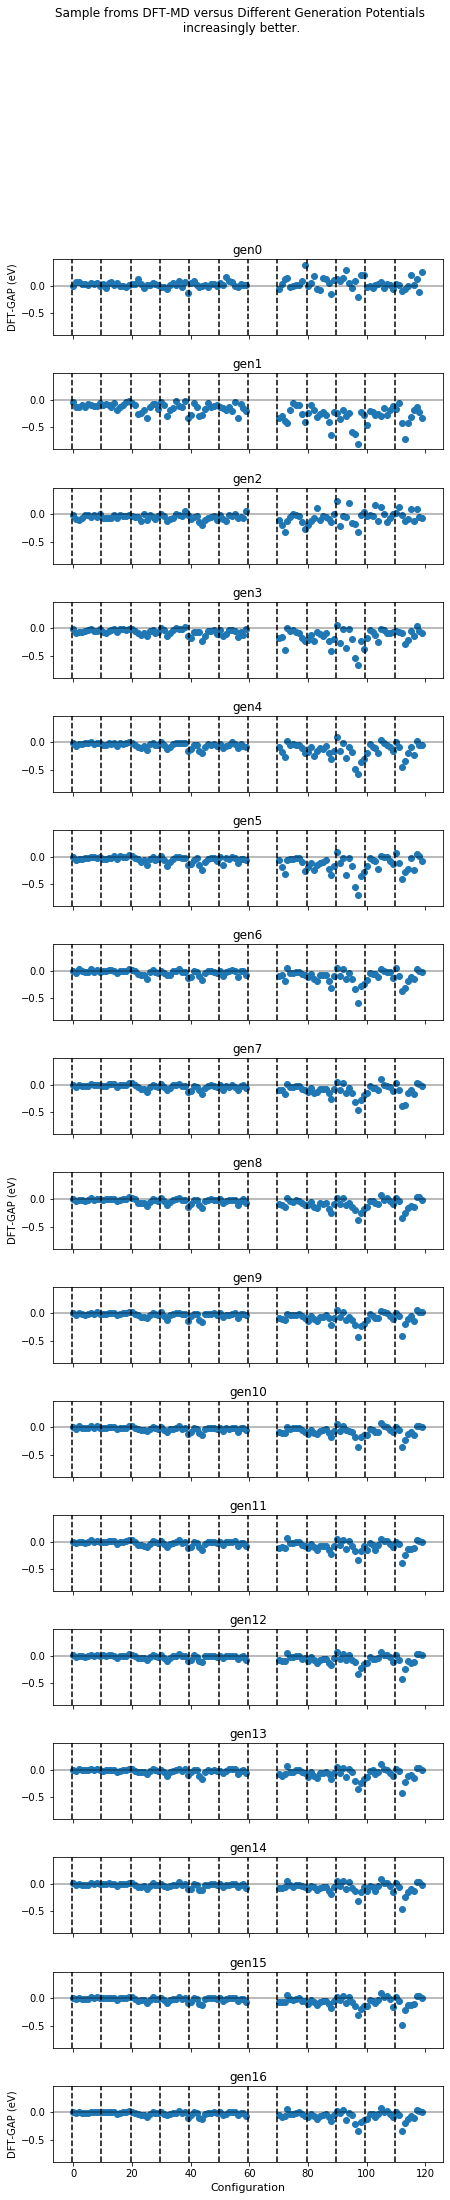

In [5]:
from ase.io import Trajectory
import numpy as np
import os

import matplotlib.pyplot as plt

os.environ['OMP_NUM_THREADS']="1"
traj = Trajectory('05052021NonPolDFTMDSampled110StructsBetween300and1400K.traj')

fig, axs = plt.subplots(len(resultsDict), sharex=True, sharey=True,figsize=(7,35), gridspec_kw={'hspace': 0.5})
fig.suptitle('Sample froms DFT-MD versus Different Generation Potentials \n increasingly better. ')

counter = 0
for gen, energies in resultsDict.items():
    
    DFTs = np.array([atoms.get_potential_energy() for atoms in traj])
    differences = DFTs - np.array(energies)
    xaxis= list(range(len(differences)))  #WE ARE MISSING 900K 
    xaxis[60:] = list(np.array(xaxis[60:])+10)
    axs[counter].scatter(xaxis,differences)
    axs[counter].set_title(gen,pad=5)
    
    for x in range(0,120,10):
        axs[counter].axvline(x-0.5,ls='--',color='k')
        axs[counter].axhline(0,ls='-',lw='0.05',color='k')

    counter+=1

axs[0].set_ylabel('DFT-GAP (eV)')
axs[int(counter/2)].set_ylabel('DFT-GAP (eV)')
axs[counter-1].set_ylabel('DFT-GAP (eV)')
axs[counter-1].set_xlabel('Configuration',fontsize=11)

## Let's see how temperatures changes

I was here gen0
I was here gen1
I was here gen2
I was here gen3
I was here gen4
I was here gen5
I was here gen6
I was here gen7
I was here gen8
I was here gen9
I was here gen10
I was here gen11
I was here gen12
I was here gen13
I was here gen14
I was here gen15
I was here gen16
I was here gen17


ValueError: x and y must have same first dimension, but have shapes (2662,) and (2965,)

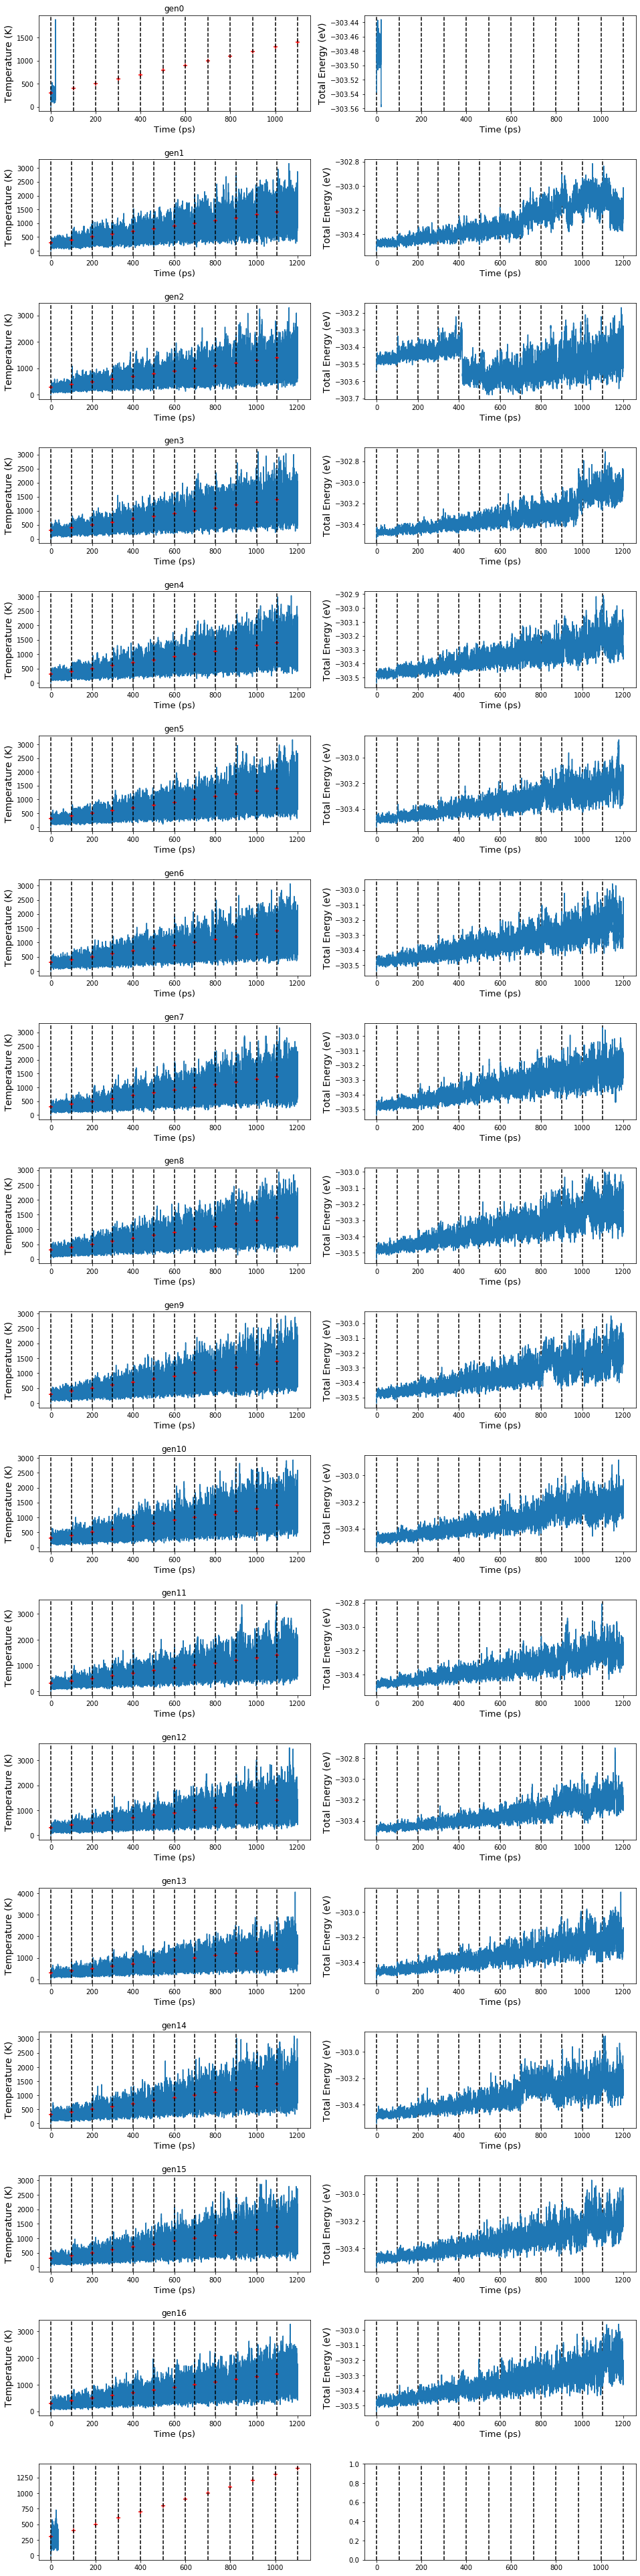

In [11]:
import matplotlib.pyplot as plt 

import glob

subdirectories = sorted(glob.glob('gen*'),key= lambda string: float(string.strip('gen')))


subdirectories


temperatureDict = {}
totalEnergyDict = {}
timeDict = {}
timeStep=0.5 #fs
writingIntervalForTrajFile = 25 #25 time steps
timeIncrementPerTrajStep = timeStep*writingIntervalForTrajFile

for path in subdirectories:
    
    temperatureDict[path] = []
    totalEnergyDict[path] = []
    print(f'I was here {path}')
#     try: 
#         with open(f'{path}/output.dat', 'r') as file:
#             for line in file:
#                 line = line.split()
#                 totalEnergyDict[path].append(float(line[-1].replace('eV','')))
#                 temperatureDict[path].append(float(line[9].replace('(T=','').replace('K)','')))
#         timeDict[path] = [a*12.5/1000 for a in range(0,len(temperatureDict[path]))]
    with open(f'{path}/MD/temperature.dat', 'r') as temperatureFile, open(f'{path}/MD/totalEnergy.dat', 'r') as energyFile:
        for line in temperatureFile:
            line = line.split()[0]
            temperatureDict[path].append(float(line))
        for line in energyFile:
            line = line.split()[0]
            totalEnergyDict[path].append(float(line))
    timeDict[path] = [a*timeIncrementPerTrajStep/1000 for a in range(0,len(temperatureDict[path]))]
#     except:
#         print(f'Calculation in directory {path} not parsed correctly')
#         subdirectories.remove(path)
#         pass
    

fig, axs = plt.subplots(len(temperatureDict),2, gridspec_kw={'hspace': 0.50}, figsize = (16,70))    


setTemperatures = [300,400,500,600,700,800,900,1000,1100,1200,1300,1400]
setTimes = [i*100 for i in range(0,12)]


counter = 0
for path in subdirectories:
    
    axs[counter][0].scatter(setTimes,setTemperatures,marker='+',c='red',zorder=1)
    for time in setTimes:
        axs[counter][0].axvline(x=time,ymin=0, ymax=1,c='k',ls='--')
    for time in setTimes:
        axs[counter][1].axvline(x=time,ymin=0, ymax=1,c='k',ls='--')
    axs[counter][0].plot(timeDict[path],temperatureDict[path],zorder=-1)
    axs[counter][1].plot(timeDict[path],totalEnergyDict[path])
    
    axs[counter][0].set_ylabel('Temperature (K)', fontsize = 14)
    axs[counter][0].set_xlabel('Time (ps)', fontsize = 13)
    axs[counter][1].set_ylabel('Total Energy (eV)', fontsize = 14)
    axs[counter][1].set_xlabel('Time (ps)', fontsize = 13)
    
    axs[counter][0].set_title(path)
    
    counter+=1

    
plt.show()